# Exploring Leading Economic Indicators

#### Notebook Structure

1. [ISM Reports for the US Manufacturing and Services Sectors](#1.-ISM-PMI-Reports-for-the-US-Manufacturing-and-Services-Sectors)
2. [University of Michigan Consumer Sentiment](#2.-University-of-Michigan-Consumer-Sentiment)
3. [U.S. Census Bureau's Building Permits Survey](#3.-U.S.-Census-Bureau's-Building-Permits-Survey)
4. [European Economic Sentiment](#4.-European-Economic-Sentiment)
5. [Caixin Manufacturing and Services PMI](#5.-Caixin-Manufacturing-and-Services-PMI)
6. [Market Data Snapshot from Trading Economics](#6.-Market-Data-Snapshot-from-Trading-Economics)
7. [Industry and Stock-Level Data from FinViz](#7.-Industry-and-Stock-Level-Data-from-FinViz)

#### Import Modules

In [32]:
from ism_report import IsmReport
from consumer_survey import ConsumerSurvey
from construction_survey import ConstructionSurvey
from euro_survey import EuroSurvey
from caixin_pmi import CaixinPmi
from trading_economics import TradingEconomics
from finviz import Finviz

from matplotlib import colors, ticker, pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
import re
import inspect
from IPython.display import display, Markdown

#### Markdown Display Function

In [4]:
def displayMD(obj: str | pd.DataFrame, bold: bool=False, italic: bool=False, block: bool=False, align: str='left', index: bool=False):
    
    if type(obj) not in (str, pd.DataFrame): 
        raise TypeError('Function only prints strings and DataFrames.')
    
    if type(obj) == str:
        text = obj
        text = re.sub(r'(?<!\n)\n(?!\n)', '<br><br>', text)
        if italic: text = f'<i>{text}</i>'
        if bold: text = f'<b>{text}</b>'
        text = f'<p style="text-align: {align}";>{text}</p>'
        if block: text = f'>{text}'
        display(Markdown(text))
    
    elif type(obj) == pd.DataFrame:
        html = obj.to_html(index=index, na_rep='&nbsp;', border=1)
        if italic: html = re.sub(r'(<th>)(.*)(</th>)', '\\1<i>\\2</i>\\3', html)
        if bold: html = re.sub(r'(<th>)(.*)(</th>)', '\\1<b>\\2</b>\\3', html)
        html = f'<div align="{align}">{html}</div>'
        if block: html = f'>{html}'
        display(Markdown(html))

## 1. ISM PMI Reports for the US Manufacturing and Services Sectors

The [ISM PMI (Purchasing Managers' Index) reports](https://www.ismworld.org/supply-management-news-and-reports/reports/ism-report-on-business/) are economic indicators published monthly by the Institute for Supply Management (ISM). These reports provide insights into the health of the manufacturing and non-manufacturing (services) sectors of the U.S. economy. The reports are based on surveys of purchasing and supply executives, and a reading above 50 indicates expansion, while a reading below 50 indicates contraction.

The ISM PMI reports are closely watched by investors, economists, and policymakers as they can influence market sentiment and potentially impact investment decisions. 

#### Getting Data from the ISM Manufacturing Report

The following are sections of the ISM manufacturing report, accessible as attributes of the ism_man object:

In [5]:
ism_man = IsmReport.download_manufacturing()

attributes = (', ').join(ism_man.__dict__.keys())
displayMD(attributes)

<p style="text-align: left";>_headline, _highlights, _overview, _comments, _full_pmi_table, _comm_price_up, _comm_price_down, _comm_supply_short, _index_summary, _new_orders_text, _new_orders_table, _production_text, _production_table, _employment_text, _employment_table, _supplier_deliveries_text, _supplier_deliveries_table, _inventories_text, _inventories_table, _customer_inventories_text, _customer_inventories_table, _prices_text, _prices_table, _backlog_orders_text, _backlog_orders_table, _export_orders_text, _export_orders_table, _imports_text, _imports_table, _buying_policy_text, _buying_policy_table, _sector_ranking, _respondents</p>

<br>The "download_manufacturing()" method gets the latest report by default. For a specific report, a URL may be passed as an argument.<br>Below are some sections from the report.

In [6]:
displayMD(ism_man.headline, bold=True, align='center')

displayMD(ism_man.overview, block=True)

displayMD(ism_man.full_pmi_table, index=True, bold=True, align='center')

displayMD("Comments from Industry", bold=True, align='center')

comments_df = ism_man.respondents
comments = ('\n').join([f'<i>{s}</i>: {c}' for s, c in zip(comments_df.index, comments_df.iloc[:, 0])])
displayMD(comments, block=True)

<p style="text-align: center";><b>Manufacturing PMI® at 48%</b></p>

><p style="text-align: left";>(Tempe, Arizona) — Economic activity in the manufacturing sector contracted in July for the fifth consecutive month, following a two-month expansion preceded by 26 straight months of contraction, say the nation's supply executives in the latest Manufacturing ISM® Report On Business®.<br><br>The report was issued today by Susan Spence, MBA, Chair of the Institute for Supply Management® (ISM®) Manufacturing Business Survey Committee:<br><br>“The Manufacturing PMI® registered 48 percent in July, a 1-percentage point decrease compared to the 49 percent recorded in June. The overall economy continued in expansion for the 63rd month after one month of contraction in April 2020. (A Manufacturing PMI® above 42.3 percent, over a period of time, generally indicates an expansion of the overall economy.) The New Orders Index contracted for the sixth month in a row following a three-month period of expansion; the figure of 47.1 percent is 0.7 percentage point higher than the 46.4 percent recorded in June. The July reading of the Production Index (51.4 percent) is 1.1 percentage points higher than June’s figure of 50.3 percent. The Prices Index remained in expansion (or ‘increasing’) territory, registering 64.8 percent, down 4.9 percentage points compared to the reading of 69.7 percent reported in June. The Backlog of Orders Index registered 46.8 percent, up 2.5 percentage points compared to the 44.3 percent recorded in June. The Employment Index registered 43.4 percent, down 1.6 percentage points from June’s figure of 45 percent.<br><br>“The Supplier Deliveries Index indicated faster delivery performance after seven consecutive months in expansion (or ‘slower’) territory. The reading of 49.3 percent is down 4.9 percentage points from the 54.2 percent recorded in June. (Supplier Deliveries is the only ISM® Report On Business® index that is inversed; a reading of above 50 percent indicates slower deliveries, which is typical as the economy improves and customer demand increases.) The Inventories Index registered 48.9 percent, down 0.3 percentage point compared to June’s reading of 49.2 percent.<br><br>“The New Export Orders Index reading of 46.1 percent is 0.2 percentage point lower than the reading of 46.3 percent registered in June. The Imports Index registered 47.6 percent, 0.2 percentage point higher than June’s reading of 47.4 percent.”<br><br>Spence continues, “In July, U.S. manufacturing activity contracted at a faster rate, with declines in the Supplier Deliveries and Employment Indexes contributing as the biggest factors in the 1-percentage point loss of the Manufacturing PMI®.<br><br>“The demand indicators improved, with the New Orders and Backlog of Orders indexes contracting at slower rates, while the Customers’ Inventories and New Export Orders indexes contracted at slightly faster rates. A ‘too low’ status for the Customers’ Inventories Index is usually considered positive for future production.<br><br>“Regarding output, the Production Index increased month over month to move further into expansion territory, however; the Employment Index dropped further into contraction as panelists indicated that managing head count is still the norm at their companies, as opposed to hiring. The mixed indicators in output suggest companies still being cautious in their hiring even with an increase in production.<br><br>“Finally, inputs (defined as supplier deliveries, inventories, prices and imports), on net, declined further into contraction territory. The Inventories Index moved marginally further into contraction territory after expanding in April, as companies work to reduce or adjust inventory to better align with demand. The Supplier Deliveries Index indicated faster deliveries as supply chain performance improved and sluggish demand continued. Prices continued to increase, but at a slower rate. The Imports Index remained in contraction but moved upward slightly.<br><br>“Looking at the manufacturing economy, 79 percent of the sector’s gross domestic product (GDP) contracted in July, up from 46 percent in June. Notably, 31 percent of GDP is strongly contracting (registering a composite PMI® of 45 percent or lower), up from 25 percent in June. The share of sector GDP with a PMI® at or below 45 percent is a good metric to gauge overall manufacturing weakness. Of the six largest manufacturing industries, none expanded in July, compared to four in June,” says Spence.<br><br>The seven manufacturing industries reporting growth in July — listed in order — are: Apparel, Leather & Allied Products; Plastics & Rubber Products; Nonmetallic Mineral Products; Textile Mills; Miscellaneous Manufacturing; Furniture & Related Products; and Primary Metals. The 10 industries reporting contraction in July — in the following order — are: Printing & Related Support Activities; Paper Products; Chemical Products; Machinery; Wood Products; Fabricated Metal Products; Computer & Electronic Products; Transportation Equipment; Electrical Equipment, Appliances & Components; and Food, Beverage & Tobacco Products.</p>

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr>
      <th><b></b></th>
      <th><b>Series Index Jul</b></th>
      <th><b>Series Index Jun</b></th>
      <th><b>Percentage Point Change</b></th>
      <th><b>Direction</b></th>
      <th><b>Rate of Change</b></th>
      <th><b>Trend (Months)</b></th>
    </tr>
    <tr>
      <th><b>Index</b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th><b>Manufacturing PMI®</b></th>
      <td>48.0</td>
      <td>49.0</td>
      <td>-1.0</td>
      <td>Contracting</td>
      <td>Faster</td>
      <td>5.0</td>
    </tr>
    <tr>
      <th><b>New Orders</b></th>
      <td>47.1</td>
      <td>46.4</td>
      <td>0.7</td>
      <td>Contracting</td>
      <td>Slower</td>
      <td>6.0</td>
    </tr>
    <tr>
      <th><b>Production</b></th>
      <td>51.4</td>
      <td>50.3</td>
      <td>1.1</td>
      <td>Growing</td>
      <td>Faster</td>
      <td>2.0</td>
    </tr>
    <tr>
      <th><b>Employment</b></th>
      <td>43.4</td>
      <td>45.0</td>
      <td>-1.6</td>
      <td>Contracting</td>
      <td>Faster</td>
      <td>6.0</td>
    </tr>
    <tr>
      <th><b>Supplier Deliveries</b></th>
      <td>49.3</td>
      <td>54.2</td>
      <td>-4.9</td>
      <td>Faster</td>
      <td>From Slower</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th><b>Inventories</b></th>
      <td>48.9</td>
      <td>49.2</td>
      <td>-0.3</td>
      <td>Contracting</td>
      <td>Faster</td>
      <td>3.0</td>
    </tr>
    <tr>
      <th><b>Customers’ Inventories</b></th>
      <td>45.7</td>
      <td>46.7</td>
      <td>-1.0</td>
      <td>Too Low</td>
      <td>Faster</td>
      <td>10.0</td>
    </tr>
    <tr>
      <th><b>Prices</b></th>
      <td>64.8</td>
      <td>69.7</td>
      <td>-4.9</td>
      <td>Increasing</td>
      <td>Slower</td>
      <td>10.0</td>
    </tr>
    <tr>
      <th><b>Backlog of Orders</b></th>
      <td>46.8</td>
      <td>44.3</td>
      <td>2.5</td>
      <td>Contracting</td>
      <td>Slower</td>
      <td>34.0</td>
    </tr>
    <tr>
      <th><b>New Export Orders</b></th>
      <td>46.1</td>
      <td>46.3</td>
      <td>-0.2</td>
      <td>Contracting</td>
      <td>Faster</td>
      <td>5.0</td>
    </tr>
    <tr>
      <th><b>Imports</b></th>
      <td>47.6</td>
      <td>47.4</td>
      <td>0.2</td>
      <td>Contracting</td>
      <td>Slower</td>
      <td>4.0</td>
    </tr>
    <tr>
      <th><b>OVERALL ECONOMY</b></th>
      <td></td>
      <td></td>
      <td></td>
      <td>Growing</td>
      <td>Slower</td>
      <td>63.0</td>
    </tr>
    <tr>
      <th><b>Manufacturing Sector</b></th>
      <td></td>
      <td></td>
      <td></td>
      <td>Contracting</td>
      <td>Faster</td>
      <td>5.0</td>
    </tr>
  </tbody>
</table></div>

<p style="text-align: center";><b>Comments from Industry</b></p>

><p style="text-align: left";><i>Computer & Electronic Products</i>: Fairly flat quarter over quarter, but with us being in the safety and security sector (and with U.S. Customs and Border Protection as a customer), the recent bill that passed should result in an increase in business in the coming months.<br><br><i>Chemical Products</i>: Sales continue at unprecedented growth, driven by data-center construction. Customers and the sales team continue to demand lower pricing, which drives down gross margins in face of input price increases, primarily from aluminum imports.<br><br><i>Apparel, Leather & Allied Products</i>: These tariff wars are beginning to wear us out. It’s been very difficult to forecast what we will pay in duties and calculate any cost savings we’ve had this year. Also, tariffs have disrupted our customs import bond. There is zero clarity about the future, and it’s been a difficult few months trying to figure out where everything is going to land and the impact on our business. So far, tremendous and unexpected costs have been incurred.<br><br><i>Machinery</i>: Currently, higher interest rates still depress the construction industry for new construction projects. Tariff policies are uncertain, which slows down (1) our investment in new projects, (2) component sourcing for new products, (3) blanket orders and (4) replenishment of large inventory quantities. Instead, we’re working to shift suppliers to lower political risk countries or develop domestic sources. We are impacted by the higher tariffs on costs of raw materials and components both sourced domestically and from overseas, and we expect expenses will be higher in the third and fourth quarters as we consume the inventory received with new and higher tariffs or update costs from domestic sources in the second quarter.<br><br><i>Fabricated Metal Products</i>: Sales softening more than usual during the summer. Negotiations with non-U.S. manufacturers are strained as we are reluctant to issue POs for deliveries three or more months into the future with prices that include current tariffs.<br><br><i>Miscellaneous Manufacturing</i>: In the health-care world we continue with ‘business as normal,’ but we are increasingly searching and assessing geopolitical risk mitigation options.<br><br><i>Electrical Equipment, Appliances & Components</i>: Tariffs are causing complete uncertainty around sourcing strategies. A sit-and-wait game for now.<br><br><i>Nonmetallic Mineral Products</i>: Sales are about on par with 2024, but nowhere near budget forecast. Tariff concerns seem to be growing as the year progresses.<br><br><i>Furniture & Related Products</i>: Business is steady, with solid bookings and backlog. Still uncertainty about tariffs and associated inflation.<br><br><i>Primary Metals</i>: Energy capacity, specifically in the grid operated by PJM Interconnection, continues to be one of the major concerns for business continuity and growth in this region. The procurement of power and rising natural gas prices in this region due to past green energy policies, coupled with future projected allocations for artificial intelligence data centers, adds additional stress to the PJM system.<br><br><i>Transportation Equipment</i>: Cautiously stable. Tariff impacts are still being monitored. Some increases have been implemented while monitoring other products.</p>

<br>The process for obtaining the ISM services report is identical. Only the sectors and a few attributes differ between _ManufactingPmi_ and _ServicesPmi_ objects

In [7]:
ism_serv = IsmReport.download_services()

displayMD(ism_serv.headline, bold=True, align='center')

displayMD(ism_serv.full_pmi_table, index=True, bold=True, align='center')

displayMD("Comments from Industry", bold=True, align='center')

comments_df = ism_serv.respondents
comments = ('\n').join([f'<i>{s}</i>: {c}' for s, c in zip(comments_df.index, comments_df.iloc[:, 0])])
displayMD(comments, block=True)

<p style="text-align: center";><b>Services PMI® at 50.1%</b></p>

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr>
      <th><b></b></th>
      <th colspan="6" halign="left">Services PMI®</th>
      <th colspan="3" halign="left">Manufacturing PMI®</th>
    </tr>
    <tr>
      <th><b></b></th>
      <th><b>Series Index Jul</b></th>
      <th><b>Series Index Jun</b></th>
      <th><b>Percent Point Change</b></th>
      <th><b>Direction</b></th>
      <th><b>Rate of Change</b></th>
      <th><b>Trend (Months)</b></th>
      <th><b>Series Index Jul</b></th>
      <th><b>Series Index Jun</b></th>
      <th><b>Percent Point Change</b></th>
    </tr>
    <tr>
      <th><b>Index</b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th><b>Services PMI®</b></th>
      <td>50.1</td>
      <td>50.8</td>
      <td>-0.7</td>
      <td>Growing</td>
      <td>Slower</td>
      <td>2.0</td>
      <td>48.0</td>
      <td>49.0</td>
      <td>-1.0</td>
    </tr>
    <tr>
      <th><b>Business Activity/ Production</b></th>
      <td>52.6</td>
      <td>54.2</td>
      <td>-1.6</td>
      <td>Growing</td>
      <td>Slower</td>
      <td>2.0</td>
      <td>51.4</td>
      <td>50.3</td>
      <td>1.1</td>
    </tr>
    <tr>
      <th><b>New Orders</b></th>
      <td>50.3</td>
      <td>51.3</td>
      <td>-1.0</td>
      <td>Growing</td>
      <td>Slower</td>
      <td>2.0</td>
      <td>47.1</td>
      <td>46.4</td>
      <td>0.7</td>
    </tr>
    <tr>
      <th><b>Employment</b></th>
      <td>46.4</td>
      <td>47.2</td>
      <td>-0.8</td>
      <td>Contracting</td>
      <td>Faster</td>
      <td>2.0</td>
      <td>43.4</td>
      <td>45.0</td>
      <td>-1.6</td>
    </tr>
    <tr>
      <th><b>Supplier Deliveries</b></th>
      <td>51.0</td>
      <td>50.3</td>
      <td>0.7</td>
      <td>Slowing</td>
      <td>Faster</td>
      <td>8.0</td>
      <td>49.3</td>
      <td>54.2</td>
      <td>-4.9</td>
    </tr>
    <tr>
      <th><b>Inventories</b></th>
      <td>51.8</td>
      <td>52.7</td>
      <td>-0.9</td>
      <td>Growing</td>
      <td>Slower</td>
      <td>2.0</td>
      <td>48.9</td>
      <td>49.2</td>
      <td>-0.3</td>
    </tr>
    <tr>
      <th><b>Prices</b></th>
      <td>69.9</td>
      <td>67.5</td>
      <td>2.4</td>
      <td>Increasing</td>
      <td>Faster</td>
      <td>98.0</td>
      <td>64.8</td>
      <td>69.7</td>
      <td>-4.9</td>
    </tr>
    <tr>
      <th><b>Backlog of Orders</b></th>
      <td>44.3</td>
      <td>42.4</td>
      <td>1.9</td>
      <td>Contracting</td>
      <td>Slower</td>
      <td>5.0</td>
      <td>46.8</td>
      <td>44.3</td>
      <td>2.5</td>
    </tr>
    <tr>
      <th><b>New Export Orders</b></th>
      <td>47.9</td>
      <td>51.1</td>
      <td>-3.2</td>
      <td>Contracting</td>
      <td>From Growing</td>
      <td>1.0</td>
      <td>46.1</td>
      <td>46.3</td>
      <td>-0.2</td>
    </tr>
    <tr>
      <th><b>Imports</b></th>
      <td>45.9</td>
      <td>51.7</td>
      <td>-5.8</td>
      <td>Contracting</td>
      <td>From Growing</td>
      <td>1.0</td>
      <td>47.6</td>
      <td>47.4</td>
      <td>0.2</td>
    </tr>
    <tr>
      <th><b>Inventory Sentiment</b></th>
      <td>53.2</td>
      <td>57.1</td>
      <td>-3.9</td>
      <td>Too High</td>
      <td>Slower</td>
      <td>27.0</td>
      <td>N/A</td>
      <td>N/A</td>
      <td>N/A</td>
    </tr>
    <tr>
      <th><b>Customers' Inventories</b></th>
      <td>N/A</td>
      <td>N/A</td>
      <td>N/A</td>
      <td>N/A</td>
      <td>N/A</td>
      <td>N/A</td>
      <td>45.7</td>
      <td>46.7</td>
      <td>-1.0</td>
    </tr>
    <tr>
      <th><b>Overall Economy</b></th>
      <td></td>
      <td></td>
      <td></td>
      <td>Growing</td>
      <td>Slower</td>
      <td>62.0</td>
      <td></td>
      <td></td>
      <td></td>
    </tr>
    <tr>
      <th><b>Services Sector</b></th>
      <td></td>
      <td></td>
      <td></td>
      <td>Growing</td>
      <td>Slower</td>
      <td>2.0</td>
      <td></td>
      <td></td>
      <td></td>
    </tr>
  </tbody>
</table></div>

<p style="text-align: center";><b>Comments from Industry</b></p>

><p style="text-align: left";><i>Accommodation & Food Services</i>: Anticipation of the final tariff impacts is resulting in delayed planning for next fiscal year purchases.<br><br><i>Agriculture, Forestry, Fishing & Hunting</i>: Higher tariffs are increasing the cost of imported feed ingredients and trace minerals for livestock and poultry feeds. Business and customer concerns over additional cost risk due to additional tariffs.<br><br><i>Construction</i>: Trade uncertainty causing client reevaluation of feasibility for projects in certain sectors, resulting in some delays or cancellations. Public-funded jobs experiencing pullbacks.<br><br><i>Educational Services</i>: Summer break for students greatly reduces demand on campus.<br><br><i>Finance & Insurance</i>: Steady business activity.<br><br><i>Health Care & Social Assistance</i>: Tariffs are causing additional costs as we continue to purchase equipment and supplies. Though we need to continue with these purchases, the cost is significant enough that we are postponing other projects to accommodate these cost changes.<br><br><i>Mining</i>: Extra purchasing to head off tariffs has leveled off. Expecting decreases in activity in the second half of 2025.<br><br><i>Real Estate, Rental & Leasing</i>: Economic uncertainty remains the dominant theme. However, the tariff talk has turned out to be much more bluster than actual policy, and businesses have seemed to tune out the noise. The outlook continues to look incrementally positive.<br><br><i>Retail Trade</i>: Retail results are solid — a little soft before and during Fourth of July week, but then a rebound. We see no reason to believe this won’t continue for the near term.<br><br><i>Transportation & Warehousing</i>: Our business activity is flat. We are not trending up or down. Tariffs are now starting to show up in pricing, and we are seeing increases across the board.</p>

## 2. University of Michigan Consumer Sentiment

The [University of Michigan Consumer Sentiment Index (MCSI)](https://www.sca.isr.umich.edu/) is a monthly survey that measures how optimistic or pessimistic US consumers are about the economy. It gauges their attitudes towards personal finances, business conditions, and overall economic activity. The index is based on interviews conducted by the University of Michigan's Institute for Social Research.

Consumer spending is a major driver of the US economy, and the MCSI is considered a leading indicator of future economic activity. 

The MCSI is composed of the Index of Current Economic Conditions (which reflects current financial situations) and the Index of Consumer Expectations (which reflects future outlook). A value of greater than 80 indicates bullish sentiment, whereas below 70 indicates bearish sentiment. 

#### Getting Data from the Consumer Survey

In [8]:
consumer = ConsumerSurvey.download()

displayMD("MCSI Current and Future Expectations", bold=True, align='center')
displayMD(consumer.table, bold=True, align='center')

<p style="text-align: center";><b>MCSI Current and Future Expectations</b></p>

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b>Year</b></th>
      <th><b>Month</b></th>
      <th><b>Index</b></th>
      <th><b>Current Index</b></th>
      <th><b>Expected Index</b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2024</td>
      <td>8</td>
      <td>67.9</td>
      <td>61.3</td>
      <td>72.1</td>
    </tr>
    <tr>
      <td>2024</td>
      <td>9</td>
      <td>70.1</td>
      <td>63.3</td>
      <td>74.4</td>
    </tr>
    <tr>
      <td>2024</td>
      <td>10</td>
      <td>70.5</td>
      <td>64.9</td>
      <td>74.1</td>
    </tr>
    <tr>
      <td>2024</td>
      <td>11</td>
      <td>71.8</td>
      <td>63.9</td>
      <td>76.9</td>
    </tr>
    <tr>
      <td>2024</td>
      <td>12</td>
      <td>74.0</td>
      <td>75.1</td>
      <td>73.3</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>1</td>
      <td>71.7</td>
      <td>75.1</td>
      <td>69.5</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>2</td>
      <td>64.7</td>
      <td>65.7</td>
      <td>64.0</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>3</td>
      <td>57.0</td>
      <td>63.8</td>
      <td>52.6</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>4</td>
      <td>52.2</td>
      <td>59.8</td>
      <td>47.3</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>5</td>
      <td>52.2</td>
      <td>58.9</td>
      <td>47.9</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>6</td>
      <td>60.7</td>
      <td>64.8</td>
      <td>58.1</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>7</td>
      <td>61.7</td>
      <td>68.0</td>
      <td>57.7</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>8</td>
      <td>58.6</td>
      <td>60.9</td>
      <td>57.2</td>
    </tr>
  </tbody>
</table></div>

## 3. U.S. Census Bureau's Building Permits Survey

The [U.S. Census Bureau's Building Permits Survey (BPS)](https://www.census.gov/construction/nrc/current/index.html) is a monthly survey that collects data on new privately-owned residential construction. It's a key economic indicator, providing statistics on the number of housing units authorized by building permits, and the valuation of those permits, at national, state, and local levels. This data is vital for understanding the health and direction of the housing market and the broader economy. 

#### Getting Data from the Building Permits Survey

In [ ]:
build = ConstructionSurvey.download()
displayMD("US Census Bureau Construction Survey Data", bold=True, align='center')
displayMD(build.table.tail(), bold=True, align='center')

<p style="text-align: center";><b>US Census Bureau Construction Survey Data</b></p>

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b>Year</b></th>
      <th><b>Month</b></th>
      <th><b>Permits</b></th>
      <th><b>Authorized</b></th>
      <th><b>Starts</b></th>
      <th><b>Under Construction</b></th>
      <th><b>Completions</b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2025</td>
      <td>3</td>
      <td>1481.0</td>
      <td>268.0</td>
      <td>1355.0</td>
      <td>1401.0</td>
      <td>1566.0</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>4</td>
      <td>1422.0</td>
      <td>268.0</td>
      <td>1398.0</td>
      <td>1393.0</td>
      <td>1475.0</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>5</td>
      <td>1394.0</td>
      <td>269.0</td>
      <td>1282.0</td>
      <td>1366.0</td>
      <td>1542.0</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>6</td>
      <td>1393.0</td>
      <td>270.0</td>
      <td>1358.0</td>
      <td>1356.0</td>
      <td>1335.0</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>7</td>
      <td>1354.0</td>
      <td>263.0</td>
      <td>1428.0</td>
      <td>1357.0</td>
      <td>1415.0</td>
    </tr>
  </tbody>
</table></div>

<br>In future, plotting methods may be built-into to the ConstructionSurvey class to allow easy visualisation of trends:

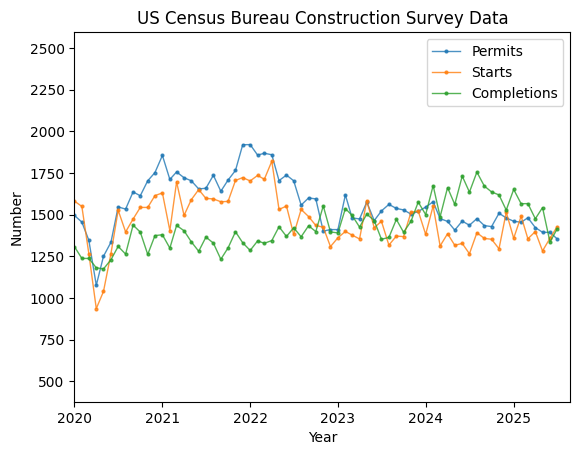

In [19]:
start_date = datetime(2020, 1, 1)
end_date = datetime.now()
line_settings = {'marker': 'o', 'alpha': 0.8, 'linewidth': 1, 'markersize': 2}

df = build.table
dates = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')

fig, ax = plt.subplots()
ax.plot(dates, df['Permits'], label='Permits', **line_settings)
ax.plot(dates, df['Starts'], label='Starts', **line_settings)
ax.plot(dates, df['Completions'], label='Completions', **line_settings)

ax.set_xlim(start_date, end_date)
ax.set_xlabel('Year')
ax.set_ylabel('Number')
ax.set_title('US Census Bureau Construction Survey Data')
ax.legend()

plt.show()

## 4. European Economic Sentiment

The [European Economic Sentiment Indicator (ESI)](https://economy-finance.ec.europa.eu/economic-forecast-and-surveys/business-and-consumer-surveys_en) is a composite measure that tracks economic confidence in the EU and euro area. It's a weighted average of confidence indicators from five key sectors: industry, services, consumers, retail trade, and construction. The ESI is used to gauge overall economic sentiment and its fluctuations, with values above 100 indicating above-average sentiment and values below 100 indicating below-average sentiment. 

#### Getting Data from the European Economic Sentiment Surveys

In [20]:
euro = EuroSurvey.download()

displayMD("EU Economic Sentiment Indicator and Components", bold=True, align='center')
displayMD(euro.table.tail(), bold=True, align='center')

<p style="text-align: center";><b>EU Economic Sentiment Indicator and Components</b></p>

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b>Year</b></th>
      <th><b>Month</b></th>
      <th><b>EU.INDU</b></th>
      <th><b>EU.SERV</b></th>
      <th><b>EU.CONS</b></th>
      <th><b>EU.RETA</b></th>
      <th><b>EU.BUIL</b></th>
      <th><b>EU.ESI</b></th>
      <th><b>EU.EEI</b></th>
      <th><b>EA.INDU</b></th>
      <th><b>EA.SERV</b></th>
      <th><b>EA.CONS</b></th>
      <th><b>EA.RETA</b></th>
      <th><b>EA.BUIL</b></th>
      <th><b>EA.ESI</b></th>
      <th><b>EA.EEI</b></th>
      <th><b>BE.INDU</b></th>
      <th><b>BE.SERV</b></th>
      <th><b>BE.CONS</b></th>
      <th><b>BE.RETA</b></th>
      <th><b>BE.BUIL</b></th>
      <th><b>BE.ESI</b></th>
      <th><b>BE.EEI</b></th>
      <th><b>BG.INDU</b></th>
      <th><b>BG.SERV</b></th>
      <th><b>BG.CONS</b></th>
      <th><b>BG.RETA</b></th>
      <th><b>BG.BUIL</b></th>
      <th><b>BG.ESI</b></th>
      <th><b>BG.EEI</b></th>
      <th><b>CZ.INDU</b></th>
      <th><b>CZ.SERV</b></th>
      <th><b>CZ.CONS</b></th>
      <th><b>CZ.RETA</b></th>
      <th><b>CZ.BUIL</b></th>
      <th><b>CZ.ESI</b></th>
      <th><b>CZ.EEI</b></th>
      <th><b>DK.INDU</b></th>
      <th><b>DK.SERV</b></th>
      <th><b>DK.CONS</b></th>
      <th><b>DK.RETA</b></th>
      <th><b>DK.BUIL</b></th>
      <th><b>DK.ESI</b></th>
      <th><b>DK.EEI</b></th>
      <th><b>DE.INDU</b></th>
      <th><b>DE.SERV</b></th>
      <th><b>DE.CONS</b></th>
      <th><b>DE.RETA</b></th>
      <th><b>DE.BUIL</b></th>
      <th><b>DE.ESI</b></th>
      <th><b>DE.EEI</b></th>
      <th><b>EE.INDU</b></th>
      <th><b>EE.SERV</b></th>
      <th><b>EE.CONS</b></th>
      <th><b>EE.RETA</b></th>
      <th><b>EE.BUIL</b></th>
      <th><b>EE.ESI</b></th>
      <th><b>EE.EEI</b></th>
      <th><b>IE.INDU</b></th>
      <th><b>IE.SERV</b></th>
      <th><b>IE.CONS</b></th>
      <th><b>IE.RETA</b></th>
      <th><b>IE.BUIL</b></th>
      <th><b>IE.ESI</b></th>
      <th><b>IE.EEI</b></th>
      <th><b>EL.INDU</b></th>
      <th><b>EL.SERV</b></th>
      <th><b>EL.CONS</b></th>
      <th><b>EL.RETA</b></th>
      <th><b>EL.BUIL</b></th>
      <th><b>EL.ESI</b></th>
      <th><b>EL.EEI</b></th>
      <th><b>ES.INDU</b></th>
      <th><b>ES.SERV</b></th>
      <th><b>ES.CONS</b></th>
      <th><b>ES.RETA</b></th>
      <th><b>ES.BUIL</b></th>
      <th><b>ES.ESI</b></th>
      <th><b>ES.EEI</b></th>
      <th><b>FR.INDU</b></th>
      <th><b>FR.SERV</b></th>
      <th><b>FR.CONS</b></th>
      <th><b>FR.RETA</b></th>
      <th><b>FR.BUIL</b></th>
      <th><b>FR.ESI</b></th>
      <th><b>FR.EEI</b></th>
      <th><b>HR.INDU</b></th>
      <th><b>HR.SERV</b></th>
      <th><b>HR.CONS</b></th>
      <th><b>HR.RETA</b></th>
      <th><b>HR.BUIL</b></th>
      <th><b>HR.ESI</b></th>
      <th><b>HR.EEI</b></th>
      <th><b>IT.INDU</b></th>
      <th><b>IT.SERV</b></th>
      <th><b>IT.CONS</b></th>
      <th><b>IT.RETA</b></th>
      <th><b>IT.BUIL</b></th>
      <th><b>IT.ESI</b></th>
      <th><b>IT.EEI</b></th>
      <th><b>CY.INDU</b></th>
      <th><b>CY.SERV</b></th>
      <th><b>CY.CONS</b></th>
      <th><b>CY.RETA</b></th>
      <th><b>CY.BUIL</b></th>
      <th><b>CY.ESI</b></th>
      <th><b>CY.EEI</b></th>
      <th><b>LV.INDU</b></th>
      <th><b>LV.SERV</b></th>
      <th><b>LV.CONS</b></th>
      <th><b>LV.RETA</b></th>
      <th><b>LV.BUIL</b></th>
      <th><b>LV.ESI</b></th>
      <th><b>LV.EEI</b></th>
      <th><b>LT.INDU</b></th>
      <th><b>LT.SERV</b></th>
      <th><b>LT.CONS</b></th>
      <th><b>LT.RETA</b></th>
      <th><b>LT.BUIL</b></th>
      <th><b>LT.ESI</b></th>
      <th><b>LT.EEI</b></th>
      <th><b>LU.INDU</b></th>
      <th><b>LU.SERV</b></th>
      <th><b>LU.CONS</b></th>
      <th><b>LU.RETA</b></th>
      <th><b>LU.BUIL</b></th>
      <th><b>LU.ESI</b></th>
      <th><b>LU.EEI</b></th>
      <th><b>HU.INDU</b></th>
      <th><b>HU.SERV</b></th>
      <th><b>HU.CONS</b></th>
      <th><b>HU.RETA</b></th>
      <th><b>HU.BUIL</b></th>
      <th><b>HU.ESI</b></th>
      <th><b>HU.EEI</b></th>
      <th><b>MT.INDU</b></th>
      <th><b>MT.SERV</b></th>
      <th><b>MT.CONS</b></th>
      <th><b>MT.RETA</b></th>
      <th><b>MT.BUIL</b></th>
      <th><b>MT.ESI</b></th>
      <th><b>MT.EEI</b></th>
      <th><b>NL.INDU</b></th>
      <th><b>NL.SERV</b></th>
      <th><b>NL.CONS</b></th>
      <th><b>NL.RETA</b></th>
      <th><b>NL.BUIL</b></th>
      <th><b>NL.ESI</b></th>
      <th><b>NL.EEI</b></th>
      <th><b>AT.INDU</b></th>
      <th><b>AT.SERV</b></th>
      <th><b>AT.CONS</b></th>
      <th><b>AT.RETA</b></th>
      <th><b>AT.BUIL</b></th>
      <th><b>AT.ESI</b></th>
      <th><b>AT.EEI</b></th>
      <th><b>PL.INDU</b></th>
      <th><b>PL.SERV</b></th>
      <th><b>PL.CONS</b></th>
      <th><b>PL.RETA</b></th>
      <th><b>PL.BUIL</b></th>
      <th><b>PL.ESI</b></th>
      <th><b>PL.EEI</b></th>
      <th><b>PT.INDU</b></th>
      <th><b>PT.SERV</b></th>
      <th><b>PT.CONS</b></th>
      <th><b>PT.RETA</b></th>
      <th><b>PT.BUIL</b></th>
      <th><b>PT.ESI</b></th>
      <th><b>PT.EEI</b></th>
      <th><b>RO.INDU</b></th>
      <th><b>RO.SERV</b></th>
      <th><b>RO.CONS</b></th>
      <th><b>RO.RETA</b></th>
      <th><b>RO.BUIL</b></th>
      <th><b>RO.ESI</b></th>
      <th><b>RO.EEI</b></th>
      <th><b>SI.INDU</b></th>
      <th><b>SI.SERV</b></th>
      <th><b>SI.CONS</b></th>
      <th><b>SI.RETA</b></th>
      <th><b>SI.BUIL</b></th>
      <th><b>SI.ESI</b></th>
      <th><b>SI.EEI</b></th>
      <th><b>SK.INDU</b></th>
      <th><b>SK.SERV</b></th>
      <th><b>SK.CONS</b></th>
      <th><b>SK.RETA</b></th>
      <th><b>SK.BUIL</b></th>
      <th><b>SK.ESI</b></th>
      <th><b>SK.EEI</b></th>
      <th><b>FI.INDU</b></th>
      <th><b>FI.SERV</b></th>
      <th><b>FI.CONS</b></th>
      <th><b>FI.RETA</b></th>
      <th><b>FI.BUIL</b></th>
      <th><b>FI.ESI</b></th>
      <th><b>FI.EEI</b></th>
      <th><b>SE.INDU</b></th>
      <th><b>SE.SERV</b></th>
      <th><b>SE.CONS</b></th>
      <th><b>SE.RETA</b></th>
      <th><b>SE.BUIL</b></th>
      <th><b>SE.ESI</b></th>
      <th><b>SE.EEI</b></th>
      <th><b>UK.INDU</b></th>
      <th><b>UK.SERV</b></th>
      <th><b>UK.CONS</b></th>
      <th><b>UK.RETA</b></th>
      <th><b>UK.BUIL</b></th>
      <th><b>UK.ESI</b></th>
      <th><b>UK.EEI</b></th>
      <th><b>ME.INDU</b></th>
      <th><b>ME.SERV</b></th>
      <th><b>ME.CONS</b></th>
      <th><b>ME.RETA</b></th>
      <th><b>ME.BUIL</b></th>
      <th><b>ME.ESI</b></th>
      <th><b>ME.EEI</b></th>
      <th><b>MK.INDU</b></th>
      <th><b>MK.SERV</b></th>
      <th><b>MK.CONS</b></th>
      <th><b>MK.RETA</b></th>
      <th><b>MK.BUIL</b></th>
      <th><b>MK.ESI</b></th>
      <th><b>MK.EEI</b></th>
      <th><b>AL.INDU</b></th>
      <th><b>AL.SERV</b></th>
      <th><b>AL.CONS</b></th>
      <th><b>AL.RETA</b></th>
      <th><b>AL.BUIL</b></th>
      <th><b>AL.ESI</b></th>
      <th><b>AL.EEI</b></th>
      <th><b>RS.INDU</b></th>
      <th><b>RS.SERV</b></th>
      <th><b>RS.CONS</b></th>
      <th><b>RS.RETA</b></th>
      <th><b>RS.BUIL</b></th>
      <th><b>RS.ESI</b></th>
      <th><b>RS.EEI</b></th>
      <th><b>TR.INDU</b></th>
      <th><b>TR.SERV</b></th>
      <th><b>TR.CONS</b></th>
      <th><b>TR.RETA</b></th>
      <th><b>TR.BUIL</b></th>
      <th><b>TR.ESI</b></th>
      <th><b>TR.EEI</b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2025</td>
      <td>3</td>
      <td>-9.9</td>
      <td>4.1</td>
      <td>-13.9</td>
      <td>-5.4</td>
      <td>-5.8</td>
      <td>96.0</td>
      <td>97.7</td>
      <td>-10.6</td>
      <td>2.5</td>
      <td>-14.5</td>
      <td>-6.9</td>
      <td>-3.6</td>
      <td>95.2</td>
      <td>96.6</td>
      <td>-13.3</td>
      <td>-2.5</td>
      <td>-15.9</td>
      <td>-11.2</td>
      <td>-5.7</td>
      <td>91.5</td>
      <td>92.6</td>
      <td>1.6</td>
      <td>11.5</td>
      <td>-20.1</td>
      <td>15.7</td>
      <td>-4.4</td>
      <td>105.4</td>
      <td>112.9</td>
      <td>-2.9</td>
      <td>34.8</td>
      <td>-12.0</td>
      <td>23.1</td>
      <td>-4.5</td>
      <td>101.4</td>
      <td>98.4</td>
      <td>1.8</td>
      <td>5.7</td>
      <td>-11.7</td>
      <td>-4.4</td>
      <td>-8.9</td>
      <td>100.8</td>
      <td>109.0</td>
      <td>-20.9</td>
      <td>1.7</td>
      <td>-10.1</td>
      <td>-24.3</td>
      <td>-13.8</td>
      <td>89.5</td>
      <td>89.5</td>
      <td>-10.2</td>
      <td>1.6</td>
      <td>-35.5</td>
      <td>-17.6</td>
      <td>-16.3</td>
      <td>90.4</td>
      <td>91.5</td>
      <td>16.9</td>
      <td>25.1</td>
      <td>-13.9</td>
      <td>-0.2</td>
      <td>23.8</td>
      <td>103.1</td>
      <td>101.6</td>
      <td>4.9</td>
      <td>28.9</td>
      <td>-43.8</td>
      <td>-5.3</td>
      <td>13.9</td>
      <td>107.6</td>
      <td>116.9</td>
      <td>-5.5</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>12.0</td>
      <td>103.4</td>
      <td>109.4</td>
      <td>-8.7</td>
      <td>-4.7</td>
      <td>-14.8</td>
      <td>-14.3</td>
      <td>-14.6</td>
      <td>96.4</td>
      <td>93.0</td>
      <td>-0.7</td>
      <td>15.0</td>
      <td>-13.4</td>
      <td>11.6</td>
      <td>11.1</td>
      <td>103.2</td>
      <td>110.0</td>
      <td>-8.3</td>
      <td>0.3</td>
      <td>-16.6</td>
      <td>10.7</td>
      <td>3.1</td>
      <td>97.7</td>
      <td>106.0</td>
      <td>-2.0</td>
      <td>31.0</td>
      <td>-16.6</td>
      <td>3.9</td>
      <td>-1.1</td>
      <td>106.1</td>
      <td>100.6</td>
      <td>-5.2</td>
      <td>2.9</td>
      <td>-13.7</td>
      <td>1.9</td>
      <td>-8.7</td>
      <td>98.3</td>
      <td>101.2</td>
      <td>-7.1</td>
      <td>0.4</td>
      <td>1.1</td>
      <td>5.1</td>
      <td>-13.0</td>
      <td>101.1</td>
      <td>104.6</td>
      <td>-19.2</td>
      <td>&lt;NA&gt;</td>
      <td>-13.0</td>
      <td>&lt;NA&gt;</td>
      <td>-26.9</td>
      <td>94.7</td>
      <td>&lt;NA&gt;</td>
      <td>-13.3</td>
      <td>-11.4</td>
      <td>-27.0</td>
      <td>-19.1</td>
      <td>-24.4</td>
      <td>95.1</td>
      <td>99.1</td>
      <td>15.5</td>
      <td>21.0</td>
      <td>-2.3</td>
      <td>-8.8</td>
      <td>0.0</td>
      <td>109.1</td>
      <td>102.2</td>
      <td>-1.2</td>
      <td>5.2</td>
      <td>-17.2</td>
      <td>5.5</td>
      <td>15.3</td>
      <td>100.2</td>
      <td>103.0</td>
      <td>-16.2</td>
      <td>3.8</td>
      <td>-16.5</td>
      <td>-9.9</td>
      <td>-20.6</td>
      <td>89.9</td>
      <td>95.2</td>
      <td>-14.8</td>
      <td>-3.3</td>
      <td>-0.9</td>
      <td>-3.1</td>
      <td>-17.3</td>
      <td>100.9</td>
      <td>103.3</td>
      <td>-5.1</td>
      <td>3.7</td>
      <td>-18.3</td>
      <td>3.7</td>
      <td>3.1</td>
      <td>102.8</td>
      <td>106.4</td>
      <td>-0.5</td>
      <td>6.8</td>
      <td>-17.5</td>
      <td>10.0</td>
      <td>-7.7</td>
      <td>102.3</td>
      <td>105.1</td>
      <td>-7.0</td>
      <td>16.5</td>
      <td>-27.5</td>
      <td>28.2</td>
      <td>11.9</td>
      <td>98.6</td>
      <td>105.4</td>
      <td>-4.2</td>
      <td>9.3</td>
      <td>-21.0</td>
      <td>9.3</td>
      <td>-6.7</td>
      <td>96.0</td>
      <td>108.1</td>
      <td>-4.7</td>
      <td>1.0</td>
      <td>-8.4</td>
      <td>-3.5</td>
      <td>-35.2</td>
      <td>92.6</td>
      <td>94.5</td>
      <td>-4.0</td>
      <td>13.8</td>
      <td>-8.0</td>
      <td>15.8</td>
      <td>-24.3</td>
      <td>94.2</td>
      <td>101.5</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>4.1</td>
      <td>17.3</td>
      <td>-2.1</td>
      <td>12.4</td>
      <td>11.3</td>
      <td>107.2</td>
      <td>116.9</td>
      <td>-11.3</td>
      <td>15.2</td>
      <td>-4.3</td>
      <td>15.2</td>
      <td>-7.7</td>
      <td>97.1</td>
      <td>116.0</td>
      <td>4.4</td>
      <td>23.8</td>
      <td>-10.1</td>
      <td>11.3</td>
      <td>-5.0</td>
      <td>105.6</td>
      <td>108.8</td>
      <td>-1.0</td>
      <td>-1.2</td>
      <td>-3.0</td>
      <td>11.1</td>
      <td>-2.3</td>
      <td>94.0</td>
      <td>100.4</td>
      <td>-0.1</td>
      <td>20.2</td>
      <td>-14.3</td>
      <td>11.9</td>
      <td>-10.9</td>
      <td>99.3</td>
      <td>97.6</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>4</td>
      <td>-10.3</td>
      <td>3.2</td>
      <td>-15.9</td>
      <td>-7.1</td>
      <td>-5.7</td>
      <td>94.6</td>
      <td>97.0</td>
      <td>-11.0</td>
      <td>1.9</td>
      <td>-16.6</td>
      <td>-8.9</td>
      <td>-3.9</td>
      <td>93.9</td>
      <td>96.6</td>
      <td>-14.0</td>
      <td>-7.9</td>
      <td>-19.5</td>
      <td>-10.7</td>
      <td>-5.8</td>
      <td>87.8</td>
      <td>89.0</td>
      <td>-0.1</td>
      <td>8.7</td>
      <td>-21.3</td>
      <td>14.7</td>
      <td>-4.4</td>
      <td>102.5</td>
      <td>110.0</td>
      <td>-7.6</td>
      <td>29.9</td>
      <td>-13.6</td>
      <td>18.4</td>
      <td>-3.1</td>
      <td>96.8</td>
      <td>93.3</td>
      <td>-3.5</td>
      <td>5.8</td>
      <td>-14.4</td>
      <td>-2.9</td>
      <td>-10.5</td>
      <td>96.7</td>
      <td>103.7</td>
      <td>-19.8</td>
      <td>2.7</td>
      <td>-10.7</td>
      <td>-26.1</td>
      <td>-16.1</td>
      <td>90.0</td>
      <td>91.3</td>
      <td>-9.1</td>
      <td>-3.4</td>
      <td>-37.0</td>
      <td>-18.9</td>
      <td>-18.3</td>
      <td>89.6</td>
      <td>90.7</td>
      <td>4.0</td>
      <td>17.9</td>
      <td>-20.9</td>
      <td>6.8</td>
      <td>21.8</td>
      <td>95.3</td>
      <td>99.7</td>
      <td>6.2</td>
      <td>30.9</td>
      <td>-46.8</td>
      <td>-4.0</td>
      <td>13.6</td>
      <td>107.4</td>
      <td>120.5</td>
      <td>-4.3</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>12.4</td>
      <td>103.8</td>
      <td>108.4</td>
      <td>-6.4</td>
      <td>-2.7</td>
      <td>-16.6</td>
      <td>-14.3</td>
      <td>-14.0</td>
      <td>96.7</td>
      <td>93.1</td>
      <td>1.3</td>
      <td>16.0</td>
      <td>-14.2</td>
      <td>1.7</td>
      <td>16.4</td>
      <td>103.3</td>
      <td>111.2</td>
      <td>-8.9</td>
      <td>-1.2</td>
      <td>-19.2</td>
      <td>9.4</td>
      <td>2.3</td>
      <td>95.9</td>
      <td>103.9</td>
      <td>-0.1</td>
      <td>21.7</td>
      <td>-17.1</td>
      <td>2.4</td>
      <td>6.8</td>
      <td>106.2</td>
      <td>106.1</td>
      <td>-5.3</td>
      <td>2.7</td>
      <td>-15.5</td>
      <td>2.8</td>
      <td>-10.7</td>
      <td>98.0</td>
      <td>99.8</td>
      <td>-7.3</td>
      <td>4.6</td>
      <td>-0.4</td>
      <td>3.3</td>
      <td>-12.7</td>
      <td>101.7</td>
      <td>103.8</td>
      <td>-8.4</td>
      <td>&lt;NA&gt;</td>
      <td>-15.9</td>
      <td>&lt;NA&gt;</td>
      <td>-23.8</td>
      <td>98.7</td>
      <td>&lt;NA&gt;</td>
      <td>-10.5</td>
      <td>-13.7</td>
      <td>-27.5</td>
      <td>-20.8</td>
      <td>-25.5</td>
      <td>93.4</td>
      <td>99.6</td>
      <td>18.2</td>
      <td>8.6</td>
      <td>-3.5</td>
      <td>-7.1</td>
      <td>24.4</td>
      <td>107.9</td>
      <td>97.0</td>
      <td>-2.8</td>
      <td>4.4</td>
      <td>-19.3</td>
      <td>1.7</td>
      <td>19.4</td>
      <td>97.7</td>
      <td>101.8</td>
      <td>-14.2</td>
      <td>0.8</td>
      <td>-21.3</td>
      <td>-3.8</td>
      <td>-18.3</td>
      <td>89.1</td>
      <td>97.6</td>
      <td>-15.8</td>
      <td>-3.5</td>
      <td>1.1</td>
      <td>-2.7</td>
      <td>-17.5</td>
      <td>101.0</td>
      <td>102.2</td>
      <td>-4.6</td>
      <td>3.0</td>
      <td>-20.3</td>
      <td>2.0</td>
      <td>2.6</td>
      <td>101.6</td>
      <td>107.4</td>
      <td>-1.4</td>
      <td>3.5</td>
      <td>-18.4</td>
      <td>8.5</td>
      <td>-7.7</td>
      <td>100.4</td>
      <td>103.0</td>
      <td>-6.9</td>
      <td>18.7</td>
      <td>-29.2</td>
      <td>4.6</td>
      <td>11.0</td>
      <td>97.7</td>
      <td>105.8</td>
      <td>-6.0</td>
      <td>5.8</td>
      <td>-23.0</td>
      <td>7.2</td>
      <td>-8.5</td>
      <td>93.3</td>
      <td>106.5</td>
      <td>-9.0</td>
      <td>0.5</td>
      <td>-7.6</td>
      <td>9.9</td>
      <td>-29.7</td>
      <td>93.1</td>
      <td>95.8</td>
      <td>-3.5</td>
      <td>15.6</td>
      <td>-13.8</td>
      <td>15.9</td>
      <td>-13.7</td>
      <td>93.0</td>
      <td>99.3</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>7.2</td>
      <td>13.0</td>
      <td>-4.1</td>
      <td>8.5</td>
      <td>9.4</td>
      <td>106.7</td>
      <td>118.1</td>
      <td>-10.1</td>
      <td>12.0</td>
      <td>-3.6</td>
      <td>9.6</td>
      <td>-7.5</td>
      <td>98.0</td>
      <td>114.4</td>
      <td>2.1</td>
      <td>23.7</td>
      <td>-11.4</td>
      <td>13.3</td>
      <td>0.9</td>
      <td>104.5</td>
      <td>118.4</td>
      <td>-2.9</td>
      <td>0.5</td>
      <td>-3.9</td>
      <td>8.9</td>
      <td>-8.0</td>
      <td>92.5</td>
      <td>98.4</td>
      <td>-0.9</td>
      <td>17.1</td>
      <td>-16.5</td>
      <td>10.5</td>
      <td>-14.5</td>
      <td>95.9</td>
      <td>94.7</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>5</td>
      <td>-10.2</td>
      <td>3.1</td>
      <td>-14.5</td>
      <td>-5.7</td>
      <td>-5.3</td>
      <td>95.3</td>
      <td>97.5</td>
      <td>-10.3</td>
      <td>2.0</td>
      <td>-15.1</td>
      <td>-7.1</td>
      <td>-3.5</td>
      <td>95.0</td>
      <td>97.1</td>
      <td>-11.2</td>
      <td>-0.3</td>
      <td>-14.4</td>
      <td>-0.3</td>
      <td>-8.4</td>
      <td>95.7</td>
      <td>91.7</td>
      <td>0.5</td>
      <td>8.4</td>
      <td>-19.5</td>
      <td>14.9</td>
      <td>-2.4</td>
      <td>103.4</td>
      <td>110.1</td>
      <td>-4.6</td>
      <td>37.6</td>
      <td>-8.5</td>
      <td>16.5</td>
      <td>-3.8</td>
      <td>102.2</td>
      <td>99.8</td>
      <td>-8.9</td>
      <td>6.0</td>
      <td>-14.4</td>
      <td>1.6</td>
      <td>-11.1</td>
      <td>92.9</td>
      <td>104.2</td>
      <td>-17.7</td>
      <td>1.9</td>
      <td>-8.7</td>
      <td>-20.0</td>
      <td>-16.1</td>
      <td>91.6</td>
      <td>94.0</td>
      <td>-10.7</td>
      <td>-6.0</td>
      <td>-36.2</td>
      <td>-14.8</td>
      <td>-18.3</td>
      <td>88.1</td>
      <td>88.7</td>
      <td>10.4</td>
      <td>18.6</td>
      <td>-16.9</td>
      <td>2.8</td>
      <td>23.3</td>
      <td>98.4</td>
      <td>97.3</td>
      <td>5.1</td>
      <td>29.5</td>
      <td>-42.7</td>
      <td>-2.5</td>
      <td>16.1</td>
      <td>107.1</td>
      <td>116.5</td>
      <td>-5.0</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>18.1</td>
      <td>103.4</td>
      <td>107.2</td>
      <td>-10.5</td>
      <td>-6.1</td>
      <td>-17.6</td>
      <td>-13.3</td>
      <td>-12.2</td>
      <td>93.1</td>
      <td>91.0</td>
      <td>2.3</td>
      <td>16.5</td>
      <td>-13.6</td>
      <td>0.2</td>
      <td>17.3</td>
      <td>104.2</td>
      <td>109.4</td>
      <td>-8.1</td>
      <td>1.7</td>
      <td>-16.2</td>
      <td>9.8</td>
      <td>2.3</td>
      <td>98.7</td>
      <td>104.3</td>
      <td>0.7</td>
      <td>15.5</td>
      <td>-15.8</td>
      <td>3.1</td>
      <td>5.3</td>
      <td>106.1</td>
      <td>110.0</td>
      <td>-3.9</td>
      <td>1.5</td>
      <td>-15.5</td>
      <td>1.1</td>
      <td>-7.8</td>
      <td>98.5</td>
      <td>101.1</td>
      <td>-8.3</td>
      <td>5.4</td>
      <td>0.2</td>
      <td>3.0</td>
      <td>-9.6</td>
      <td>101.2</td>
      <td>103.4</td>
      <td>-6.3</td>
      <td>&lt;NA&gt;</td>
      <td>-6.9</td>
      <td>&lt;NA&gt;</td>
      <td>-24.5</td>
      <td>104.5</td>
      <td>&lt;NA&gt;</td>
      <td>-13.7</td>
      <td>-15.3</td>
      <td>-28.1</td>
      <td>-24.5</td>
      <td>-27.7</td>
      <td>91.5</td>
      <td>97.6</td>
      <td>-17.0</td>
      <td>20.1</td>
      <td>-0.3</td>
      <td>9.6</td>
      <td>16.8</td>
      <td>97.5</td>
      <td>102.0</td>
      <td>-3.5</td>
      <td>3.9</td>
      <td>-17.6</td>
      <td>0.1</td>
      <td>16.8</td>
      <td>96.9</td>
      <td>101.9</td>
      <td>-13.3</td>
      <td>6.9</td>
      <td>-18.5</td>
      <td>-5.2</td>
      <td>-19.4</td>
      <td>91.7</td>
      <td>90.5</td>
      <td>-16.0</td>
      <td>-4.1</td>
      <td>1.8</td>
      <td>-2.2</td>
      <td>-17.9</td>
      <td>100.4</td>
      <td>102.4</td>
      <td>-4.5</td>
      <td>12.1</td>
      <td>-15.9</td>
      <td>1.9</td>
      <td>4.0</td>
      <td>105.9</td>
      <td>105.4</td>
      <td>-2.1</td>
      <td>3.4</td>
      <td>-15.8</td>
      <td>-0.9</td>
      <td>-8.8</td>
      <td>99.1</td>
      <td>105.2</td>
      <td>-8.2</td>
      <td>17.1</td>
      <td>-24.9</td>
      <td>9.2</td>
      <td>6.0</td>
      <td>98.1</td>
      <td>104.6</td>
      <td>-6.0</td>
      <td>-3.0</td>
      <td>-22.2</td>
      <td>7.1</td>
      <td>-9.3</td>
      <td>91.3</td>
      <td>107.5</td>
      <td>-9.2</td>
      <td>2.7</td>
      <td>-8.3</td>
      <td>10.5</td>
      <td>-30.9</td>
      <td>92.5</td>
      <td>97.5</td>
      <td>-2.2</td>
      <td>14.3</td>
      <td>-10.4</td>
      <td>18.2</td>
      <td>-10.2</td>
      <td>95.1</td>
      <td>99.8</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>4.4</td>
      <td>8.9</td>
      <td>-1.6</td>
      <td>9.3</td>
      <td>12.0</td>
      <td>104.4</td>
      <td>114.9</td>
      <td>-9.4</td>
      <td>14.4</td>
      <td>-2.4</td>
      <td>5.0</td>
      <td>-6.7</td>
      <td>100.2</td>
      <td>112.0</td>
      <td>4.6</td>
      <td>30.0</td>
      <td>-10.6</td>
      <td>13.6</td>
      <td>-3.6</td>
      <td>107.7</td>
      <td>118.8</td>
      <td>-3.0</td>
      <td>-4.8</td>
      <td>-4.8</td>
      <td>10.9</td>
      <td>-5.5</td>
      <td>90.4</td>
      <td>97.8</td>
      <td>-2.4</td>
      <td>18.4</td>
      <td>-15.5</td>
      <td>12.0</td>
      <td>-11.6</td>
      <td>96.3</td>
      <td>93.5</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>6</td>
      <td>-11.3</td>
      <td>3.5</td>
      <td>-14.8</td>
      <td>-6.4</td>
      <td>-4.7</td>
      <td>94.3</td>
      <td>97.7</td>
      <td>-11.8</td>
      <td>3.1</td>
      <td>-15.3</td>
      <td>-7.6</td>
      <td>-2.9</td>
      <td>94.2</td>
      <td>97.2</td>
      <td>-9.3</td>
      <td>3.5</td>
      <td>-12.8</td>
      <td>-7.8</td>
      <td>-7.5</td>
      <td>97.6</td>
      <td>94.8</td>
      <td>-0.3</td>
      <td>11.2</td>
      <td>-20.0</td>
      <td>16.6</td>
      <td>2.6</td>
      <td>104.0</td>
      <td>113.3</td>
      <td>-7.6</td>
      <td>36.2</td>
      <td>-8.5</td>
      <td>9.6</td>
      <td>0.7</td>
      <td>99.0</td>
      <td>100.4</td>
      <td>-11.3</td>
      <td>6.6</td>
      <td>-13.4</td>
      <td>0.0</td>
      <td>-9.8</td>
      <td>92.6</td>
      <td>102.7</td>
      <td>-20.7</td>
      <td>4.0</td>
      <td>-8.8</td>
      <td>-21.5</td>
      <td>-13.8</td>
      <td>90.8</td>
      <td>91.2</td>
      <td>-12.1</td>
      <td>-10.1</td>
      <td>-35.8</td>
      <td>-13.8</td>
      <td>-18.2</td>
      <td>87.4</td>
      <td>89.7</td>
      <td>9.9</td>
      <td>18.3</td>
      <td>-13.4</td>
      <td>1.9</td>
      <td>19.5</td>
      <td>98.7</td>
      <td>92.4</td>
      <td>3.2</td>
      <td>29.3</td>
      <td>-46.9</td>
      <td>12.7</td>
      <td>21.8</td>
      <td>106.1</td>
      <td>113.6</td>
      <td>-6.2</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>16.5</td>
      <td>102.1</td>
      <td>109.2</td>
      <td>-12.6</td>
      <td>-7.0</td>
      <td>-17.5</td>
      <td>-14.6</td>
      <td>-12.3</td>
      <td>89.9</td>
      <td>92.9</td>
      <td>1.7</td>
      <td>14.0</td>
      <td>-11.4</td>
      <td>-4.8</td>
      <td>13.6</td>
      <td>104.5</td>
      <td>98.6</td>
      <td>-7.5</td>
      <td>2.4</td>
      <td>-17.3</td>
      <td>8.9</td>
      <td>3.5</td>
      <td>99.0</td>
      <td>107.5</td>
      <td>-0.7</td>
      <td>14.8</td>
      <td>-14.8</td>
      <td>-2.3</td>
      <td>7.8</td>
      <td>104.7</td>
      <td>106.9</td>
      <td>-3.7</td>
      <td>0.9</td>
      <td>-11.1</td>
      <td>0.6</td>
      <td>-8.5</td>
      <td>99.1</td>
      <td>100.0</td>
      <td>-8.4</td>
      <td>7.4</td>
      <td>0.0</td>
      <td>1.4</td>
      <td>-10.7</td>
      <td>101.5</td>
      <td>102.4</td>
      <td>-16.0</td>
      <td>&lt;NA&gt;</td>
      <td>-11.9</td>
      <td>&lt;NA&gt;</td>
      <td>-21.5</td>
      <td>96.3</td>
      <td>&lt;NA&gt;</td>
      <td>-11.0</td>
      <td>-17.6</td>
      <td>-29.5</td>
      <td>-23.5</td>
      <td>-31.1</td>
      <td>93.1</td>
      <td>96.8</td>
      <td>8.6</td>
      <td>5.4</td>
      <td>-0.3</td>
      <td>9.1</td>
      <td>46.5</td>
      <td>106.5</td>
      <td>108.5</td>
      <td>-4.4</td>
      <td>5.1</td>
      <td>-16.0</td>
      <td>2.0</td>
      <td>17.6</td>
      <td>97.2</td>
      <td>104.9</td>
      <td>-15.7</td>
      <td>5.0</td>
      <td>-18.4</td>
      <td>-3.2</td>
      <td>-19.0</td>
      <td>90.4</td>
      <td>92.4</td>
      <td>-15.4</td>
      <td>-3.4</td>
      <td>2.8</td>
      <td>-1.8</td>
      <td>-18.6</td>
      <td>101.5</td>
      <td>103.1</td>
      <td>-3.3</td>
      <td>14.3</td>
      <td>-16.1</td>
      <td>2.9</td>
      <td>4.9</td>
      <td>107.3</td>
      <td>106.5</td>
      <td>-1.6</td>
      <td>3.5</td>
      <td>-25.1</td>
      <td>-1.8</td>
      <td>-9.1</td>
      <td>96.8</td>
      <td>103.8</td>
      <td>-10.2</td>
      <td>15.4</td>
      <td>-25.8</td>
      <td>-1.5</td>
      <td>3.7</td>
      <td>95.5</td>
      <td>104.6</td>
      <td>-7.0</td>
      <td>-0.2</td>
      <td>-21.3</td>
      <td>8.5</td>
      <td>-2.2</td>
      <td>92.9</td>
      <td>107.5</td>
      <td>-9.0</td>
      <td>5.5</td>
      <td>-8.2</td>
      <td>3.6</td>
      <td>-32.3</td>
      <td>93.5</td>
      <td>95.1</td>
      <td>-3.5</td>
      <td>12.0</td>
      <td>-8.0</td>
      <td>13.1</td>
      <td>-11.8</td>
      <td>94.4</td>
      <td>99.3</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>6.0</td>
      <td>9.5</td>
      <td>-0.4</td>
      <td>6.8</td>
      <td>6.8</td>
      <td>107.1</td>
      <td>109.2</td>
      <td>-10.5</td>
      <td>13.4</td>
      <td>0.2</td>
      <td>10.1</td>
      <td>-9.8</td>
      <td>98.5</td>
      <td>114.4</td>
      <td>3.6</td>
      <td>25.4</td>
      <td>-10.2</td>
      <td>10.7</td>
      <td>-3.8</td>
      <td>105.0</td>
      <td>109.5</td>
      <td>-5.9</td>
      <td>-5.4</td>
      <td>-3.1</td>
      <td>9.6</td>
      <td>-6.3</td>
      <td>87.7</td>
      <td>92.7</td>
      <td>-2.2</td>
      <td>19.2</td>
      <td>-15.2</td>
      <td>9.6</td>
      <td>-13.0</td>
      <td>96.6</td>
      <td>92.4</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>7</td>
      <td>-10.4</td>
      <td>4.2</td>
      <td>-14.5</td>
      <td>-5.6</td>
      <td>-5.3</td>
      <td>95.3</td>
      <td>97.4</td>
      <td>-10.4</td>
      <td>4.1</td>
      <td>-14.7</td>
      <td>-6.7</td>
      <td>-3.0</td>
      <td>95.8</td>
      <td>97.5</td>
      <td>-13.8</td>
      <td>2.9</td>
      <td>-12.0</td>
      <td>-3.3</td>
      <td>-7.0</td>
      <td>95.2</td>
      <td>94.8</td>
      <td>-1.6</td>
      <td>11.1</td>
      <td>-19.8</td>
      <td>14.1</td>
      <td>5.2</td>
      <td>103.2</td>
      <td>109.8</td>
      <td>-9.7</td>
      <td>32.8</td>
      <td>-6.1</td>
      <td>14.4</td>
      <td>0.0</td>
      <td>97.1</td>
      <td>97.0</td>
      <td>-14.4</td>
      <td>8.0</td>
      <td>-12.8</td>
      <td>-1.3</td>
      <td>-12.1</td>
      <td>91.0</td>
      <td>104.0</td>
      <td>-18.2</td>
      <td>4.0</td>
      <td>-8.4</td>
      <td>-23.2</td>
      <td>-13.1</td>
      <td>92.0</td>
      <td>92.1</td>
      <td>-10.7</td>
      <td>-6.0</td>
      <td>-38.9</td>
      <td>-12.0</td>
      <td>-10.1</td>
      <td>88.0</td>
      <td>92.6</td>
      <td>5.8</td>
      <td>26.3</td>
      <td>-17.7</td>
      <td>12.0</td>
      <td>25.3</td>
      <td>100.0</td>
      <td>89.5</td>
      <td>9.6</td>
      <td>30.2</td>
      <td>-47.6</td>
      <td>-0.1</td>
      <td>18.0</td>
      <td>109.1</td>
      <td>115.5</td>
      <td>-4.5</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>18.3</td>
      <td>104.3</td>
      <td>109.3</td>
      <td>-11.4</td>
      <td>-4.5</td>
      <td>-16.8</td>
      <td>-11.4</td>
      <td>-14.5</td>
      <td>92.3</td>
      <td>93.2</td>
      <td>2.2</td>
      <td>6.1</td>
      <td>-11.5</td>
      <td>3.8</td>
      <td>16.6</td>
      <td>103.3</td>
      <td>105.8</td>
      <td>-7.0</td>
      <td>0.9</td>
      <td>-17.0</td>
      <td>12.2</td>
      <td>3.6</td>
      <td>99.4</td>
      <td>105.5</td>
      <td>1.6</td>
      <td>19.4</td>
      <td>-19.1</td>
      <td>0.4</td>
      <td>13.7</td>
      <td>106.4</td>
      <td>109.8</td>
      <td>-3.3</td>
      <td>0.0</td>
      <td>-9.3</td>
      <td>1.4</td>
      <td>-9.0</td>
      <td>99.5</td>
      <td>98.2</td>
      <td>-7.5</td>
      <td>4.7</td>
      <td>-0.3</td>
      <td>0.9</td>
      <td>-12.8</td>
      <td>101.5</td>
      <td>102.6</td>
      <td>-14.1</td>
      <td>&lt;NA&gt;</td>
      <td>-9.4</td>
      <td>&lt;NA&gt;</td>
      <td>-22.6</td>
      <td>99.1</td>
      <td>&lt;NA&gt;</td>
      <td>-14.6</td>
      <td>-16.8</td>
      <td>-29.1</td>
      <td>-23.9</td>
      <td>-30.0</td>
      <td>89.7</td>
      <td>94.4</td>
      <td>-5.8</td>
      <td>0.6</td>
      <td>2.9</td>
      <td>-7.2</td>
      <td>-4.0</td>
      <td>97.1</td>
      <td>97.6</td>
      <td>-4.9</td>
      <td>6.0</td>
      <td>-14.2</td>
      <td>0.8</td>
      <td>19.0</td>
      <td>97.0</td>
      <td>102.2</td>
      <td>-14.3</td>
      <td>9.6</td>
      <td>-17.0</td>
      <td>-1.4</td>
      <td>-16.6</td>
      <td>92.7</td>
      <td>96.0</td>
      <td>-15.9</td>
      <td>-3.6</td>
      <td>-2.5</td>
      <td>-2.3</td>
      <td>-17.8</td>
      <td>99.4</td>
      <td>102.3</td>
      <td>-3.1</td>
      <td>11.7</td>
      <td>-15.0</td>
      <td>3.8</td>
      <td>3.3</td>
      <td>106.6</td>
      <td>107.4</td>
      <td>-2.0</td>
      <td>2.5</td>
      <td>-31.4</td>
      <td>-5.5</td>
      <td>-9.4</td>
      <td>94.7</td>
      <td>100.1</td>
      <td>-7.1</td>
      <td>15.1</td>
      <td>-28.2</td>
      <td>4.2</td>
      <td>5.9</td>
      <td>96.7</td>
      <td>103.0</td>
      <td>-2.9</td>
      <td>0.3</td>
      <td>-19.8</td>
      <td>10.0</td>
      <td>-6.0</td>
      <td>95.0</td>
      <td>104.4</td>
      <td>-5.2</td>
      <td>4.2</td>
      <td>-6.7</td>
      <td>0.7</td>
      <td>-36.6</td>
      <td>95.2</td>
      <td>96.2</td>
      <td>-7.0</td>
      <td>18.6</td>
      <td>-5.7</td>
      <td>17.6</td>
      <td>-19.2</td>
      <td>95.0</td>
      <td>97.3</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>6.2</td>
      <td>10.9</td>
      <td>-3.8</td>
      <td>5.5</td>
      <td>5.7</td>
      <td>105.1</td>
      <td>110.5</td>
      <td>-9.3</td>
      <td>10.7</td>
      <td>1.1</td>
      <td>12.0</td>
      <td>-6.0</td>
      <td>99.9</td>
      <td>116.1</td>
      <td>3.9</td>
      <td>30.8</td>
      <td>-11.1</td>
      <td>10.3</td>
      <td>-5.4</td>
      <td>104.4</td>
      <td>119.4</td>
      <td>-5.4</td>
      <td>-4.3</td>
      <td>-6.3</td>
      <td>11.1</td>
      <td>-7.4</td>
      <td>87.6</td>
      <td>97.4</td>
      <td>-1.9</td>
      <td>18.4</td>
      <td>-17.1</td>
      <td>10.2</td>
      <td>-11.4</td>
      <td>96.0</td>
      <td>92.4</td>
    </tr>
  </tbody>
</table></div>

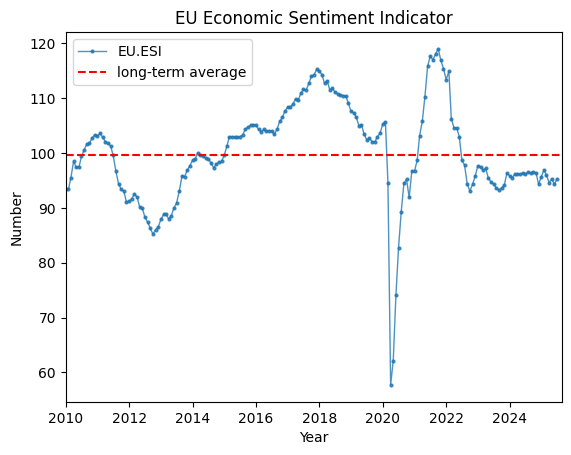

In [21]:
region = 'EU'
sector = 'ESI'
start_date = datetime(2010, 1, 1)
end_date = datetime.now()
line_settings = {'marker': 'o', 'alpha': 0.8, 'linewidth': 1, 'markersize': 2}

df = euro.table
df = df[['Year', 'Month', f'{region}.{sector}']].dropna()
dates = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')
series = df[f'{region}.{sector}']

fig, ax = plt.subplots()
ax.plot(dates, series, label=f'{region}.{sector}', **line_settings)
ax.hlines(series.mean(), start_date, end_date, label='long-term average', colors='r', linestyles='dashed')

ax.set_xlim(start_date, end_date)
ax.set_xlabel('Year')
ax.set_ylabel('Number')
ax.set_title(f'EU Economic Sentiment Indicator')
ax.legend()

plt.show()

## 5. Caixin Manufacturing and Services PMI

The Caixin PMI (Purchasing Managers' Index) is a monthly indicator of the economic health of China's [manufacturing](https://tradingeconomics.com/china/manufacturing-pmi) and [services](https://tradingeconomics.com/china/services-pmi) sectors, specifically focusing on the private sector. Readings above 50 indicate expansion, while those below 50 suggest contraction. The Caixin PMI is closely watched by policymakers and traders as it provides early insights into the performance of Chinese businesses. 

#### Getting Data from the Caixin Manufacturing and Services PMI

In [23]:
caixin = CaixinPmi.download()

joint_table = caixin.manufacturing_table.merge(caixin.services_table)
displayMD("Caixin PMI", bold=True, align='center')
displayMD(joint_table, bold=True, align='center')

<p style="text-align: center";><b>Caixin PMI</b></p>

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b>Year</b></th>
      <th><b>Month</b></th>
      <th><b>Manufacturing PMI</b></th>
      <th><b>Services PMI</b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2025</td>
      <td>5</td>
      <td>48.3</td>
      <td>51.1</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>6</td>
      <td>50.4</td>
      <td>50.6</td>
    </tr>
    <tr>
      <td>2025</td>
      <td>7</td>
      <td>49.5</td>
      <td>52.6</td>
    </tr>
  </tbody>
</table></div>

## 6. Market Data Snapshot from Trading Economics

[Trading Economics](https://tradingeconomics.com/commodities) provides a wealth of data related to the global economy in powerful formats. The classes and functions used below are written for the convenience of carrying out custom computations/visualizations with the data.

#### Getting Market Data from Trading Economics

The TradingEconomics class has five subclasses: commodities, stock indices, bonds, currencies, and crypto assets. Each of the subclasses have a few DataFrames as attributes which show different segments of data for that asset class.<br><br>To instantiate each of these subclasses, the relevant download method from the parent class (TradingEconomics) is used.

In [24]:
trad_econ = TradingEconomics()

methods = (', ').join([item[0] for item in inspect.getmembers(trad_econ) if not item[0].startswith('_')])
displayMD(methods)

<p style="text-align: left";>download_bonds, download_commodities, download_crypto, download_currencies, download_stocks</p>

<br> After instantiation of a subclass, the various tables (DataFrames) can be accessed using dot notation as shown below.

In [25]:
commodities = TradingEconomics.download_commodities()

energy_table = commodities.energy
energy_table = energy_table.set_index(energy_table.columns[0])
displayMD("Commodities - Energy", bold=True, align='center')
displayMD(energy_table, index=True, bold=True, align='center')

metals_table = commodities.metals
metals_table = metals_table.set_index(metals_table.columns[0])
displayMD("Commodities - Metals", bold=True, align='center')
displayMD(metals_table, index=True, bold=True, align='center')

# Use .all to get all data combined into one table, e.g., commodities.all, stocks.all, bonds.all

<p style="text-align: center";><b>Commodities - Energy</b></p>

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b></b></th>
      <th><b>Unit</b></th>
      <th><b>Price</b></th>
      <th><b>Day %</b></th>
      <th><b>Weekly %</b></th>
      <th><b>Monthly %</b></th>
      <th><b>YTD %</b></th>
      <th><b>YoY %</b></th>
      <th><b>Date</b></th>
    </tr>
    <tr>
      <th><b>Energy</b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th><b>Crude Oil</b></th>
      <td>USD/Bbl</td>
      <td>63.77</td>
      <td>0.39</td>
      <td>2.89</td>
      <td>-2.27</td>
      <td>-11.08</td>
      <td>-14.78</td>
      <td>Aug/22</td>
    </tr>
    <tr>
      <th><b>Brent</b></th>
      <td>USD/Bbl</td>
      <td>67.81</td>
      <td>0.21</td>
      <td>2.98</td>
      <td>-1.02</td>
      <td>-9.15</td>
      <td>-14.19</td>
      <td>Aug/22</td>
    </tr>
    <tr>
      <th><b>Natural gas</b></th>
      <td>USD/MMBtu</td>
      <td>2.6908</td>
      <td>-4.78</td>
      <td>-7.72</td>
      <td>-12.55</td>
      <td>-25.93</td>
      <td>23.43</td>
      <td>Aug/22</td>
    </tr>
    <tr>
      <th><b>Gasoline</b></th>
      <td>USD/Gal</td>
      <td>2.1576</td>
      <td>-0.35</td>
      <td>3.78</td>
      <td>1.82</td>
      <td>7.22</td>
      <td>-5.61</td>
      <td>Aug/22</td>
    </tr>
    <tr>
      <th><b>Heating Oil</b></th>
      <td>USD/Gal</td>
      <td>2.309</td>
      <td>-0.69</td>
      <td>3.78</td>
      <td>-5.72</td>
      <td>-0.35</td>
      <td>0.0</td>
      <td>Aug/22</td>
    </tr>
    <tr>
      <th><b>Coal</b></th>
      <td>USD/T</td>
      <td>111.3</td>
      <td>0.63</td>
      <td>0.41</td>
      <td>1.27</td>
      <td>-11.14</td>
      <td>-23.35</td>
      <td>Aug/22</td>
    </tr>
    <tr>
      <th><b>TTF Gas</b></th>
      <td>EUR/MWh</td>
      <td>33.45</td>
      <td>0.59</td>
      <td>7.81</td>
      <td>2.33</td>
      <td>-33.7</td>
      <td>-8.61</td>
      <td>Aug/22</td>
    </tr>
    <tr>
      <th><b>UK Gas</b></th>
      <td>GBp/thm</td>
      <td>83.45</td>
      <td>1.19</td>
      <td>9.16</td>
      <td>6.22</td>
      <td>-33.45</td>
      <td>-5.17</td>
      <td>Aug/22</td>
    </tr>
    <tr>
      <th><b>Ethanol</b></th>
      <td>USD/Gal</td>
      <td>1.82</td>
      <td>2.54</td>
      <td>3.41</td>
      <td>3.12</td>
      <td>7.69</td>
      <td>-0.41</td>
      <td>Aug/22</td>
    </tr>
    <tr>
      <th><b>Naphtha</b></th>
      <td>USD/T</td>
      <td>558.16</td>
      <td>-0.19</td>
      <td>1.01</td>
      <td>1.77</td>
      <td>-8.72</td>
      <td>-15.3</td>
      <td>Aug/22</td>
    </tr>
    <tr>
      <th><b>Uranium</b></th>
      <td>USD/Lbs</td>
      <td>74.05</td>
      <td>1.09</td>
      <td>1.44</td>
      <td>2.07</td>
      <td>1.44</td>
      <td>-10.13</td>
      <td>Aug/22</td>
    </tr>
    <tr>
      <th><b>Propane</b></th>
      <td>USD/Gal</td>
      <td>0.68</td>
      <td>-0.54</td>
      <td>1.43</td>
      <td>-4.93</td>
      <td>-12.47</td>
      <td>-11.5</td>
      <td>Aug/22</td>
    </tr>
    <tr>
      <th><b>Methanol</b></th>
      <td>CNY/T</td>
      <td>2294.0</td>
      <td>-0.86</td>
      <td>-0.95</td>
      <td>-3.69</td>
      <td>-17.09</td>
      <td>-6.14</td>
      <td>Aug/22</td>
    </tr>
    <tr>
      <th><b>Coking Coal</b></th>
      <td>CNY/T</td>
      <td>188.5</td>
      <td>0.0</td>
      <td>-3.33</td>
      <td>-2.33</td>
      <td>-6.68</td>
      <td>-3.83</td>
      <td>Aug/22</td>
    </tr>
    <tr>
      <th><b>Germany Natural Gas THE</b></th>
      <td>EUR/MWh</td>
      <td>34.98</td>
      <td>1.0</td>
      <td>7.14</td>
      <td>3.08</td>
      <td>-29.86</td>
      <td>-5.18</td>
      <td>Aug/22</td>
    </tr>
    <tr>
      <th><b>Urals Oil</b></th>
      <td>USD/Bbl</td>
      <td>63.1</td>
      <td>0.02</td>
      <td>-0.61</td>
      <td>-4.03</td>
      <td>-7.9</td>
      <td>-13.18</td>
      <td>Aug/21</td>
    </tr>
  </tbody>
</table></div>

<p style="text-align: center";><b>Commodities - Metals</b></p>

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b></b></th>
      <th><b>Unit</b></th>
      <th><b>Price</b></th>
      <th><b>Day %</b></th>
      <th><b>Weekly %</b></th>
      <th><b>Monthly %</b></th>
      <th><b>YTD %</b></th>
      <th><b>YoY %</b></th>
      <th><b>Date</b></th>
    </tr>
    <tr>
      <th><b>Metals</b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th><b>Gold</b></th>
      <td>USD/t.oz</td>
      <td>3371.09</td>
      <td>0.95</td>
      <td>1.04</td>
      <td>-0.49</td>
      <td>28.45</td>
      <td>34.33</td>
      <td>Aug/22</td>
    </tr>
    <tr>
      <th><b>Silver</b></th>
      <td>USD/t.oz</td>
      <td>38.873</td>
      <td>1.92</td>
      <td>2.27</td>
      <td>-0.99</td>
      <td>34.61</td>
      <td>30.34</td>
      <td>Aug/22</td>
    </tr>
    <tr>
      <th><b>Copper</b></th>
      <td>USD/Lbs</td>
      <td>4.4515</td>
      <td>0.23</td>
      <td>-0.44</td>
      <td>-23.43</td>
      <td>11.85</td>
      <td>5.96</td>
      <td>Aug/22</td>
    </tr>
    <tr>
      <th><b>Steel</b></th>
      <td>CNY/T</td>
      <td>3154.0</td>
      <td>1.03</td>
      <td>-1.35</td>
      <td>-1.68</td>
      <td>-4.71</td>
      <td>5.27</td>
      <td>Aug/22</td>
    </tr>
    <tr>
      <th><b>Lithium</b></th>
      <td>CNY/T</td>
      <td>85683.0</td>
      <td>0.0</td>
      <td>4.49</td>
      <td>24.0</td>
      <td>14.17</td>
      <td>15.01</td>
      <td>Aug/21</td>
    </tr>
    <tr>
      <th><b>Iron Ore CNY</b></th>
      <td>CNY/T</td>
      <td>768.5</td>
      <td>-0.58</td>
      <td>-1.79</td>
      <td>-4.83</td>
      <td>-1.35</td>
      <td>6.81</td>
      <td>Aug/22</td>
    </tr>
    <tr>
      <th><b>Platinum</b></th>
      <td>USD/t.oz</td>
      <td>1351.6</td>
      <td>0.73</td>
      <td>1.41</td>
      <td>-5.99</td>
      <td>51.19</td>
      <td>40.73</td>
      <td>Aug/22</td>
    </tr>
    <tr>
      <th><b>Calcium</b></th>
      <td>USD/MT</td>
      <td>65250.0</td>
      <td>0.1</td>
      <td>0.33</td>
      <td>-3.31</td>
      <td>-7.43</td>
      <td>-7.43</td>
      <td>Aug/22</td>
    </tr>
    <tr>
      <th><b>HRC Steel</b></th>
      <td>USD/T</td>
      <td>830.05</td>
      <td>-0.11</td>
      <td>-0.23</td>
      <td>-5.25</td>
      <td>17.07</td>
      <td>12.93</td>
      <td>Aug/22</td>
    </tr>
    <tr>
      <th><b>Iron Ore</b></th>
      <td>USD/T</td>
      <td>101.42</td>
      <td>-0.15</td>
      <td>-0.17</td>
      <td>3.21</td>
      <td>-2.11</td>
      <td>3.44</td>
      <td>Aug/22</td>
    </tr>
    <tr>
      <th><b>Silicon</b></th>
      <td>CNY/T</td>
      <td>8710.0</td>
      <td>4.81</td>
      <td>2.59</td>
      <td>-8.56</td>
      <td>-22.92</td>
      <td>-30.49</td>
      <td>Aug/22</td>
    </tr>
    <tr>
      <th><b>Scrap Steel</b></th>
      <td>USD/T</td>
      <td>346.5</td>
      <td>-0.29</td>
      <td>-0.29</td>
      <td>0.14</td>
      <td></td>
      <td>-3.62</td>
      <td>Aug/22</td>
    </tr>
    <tr>
      <th><b>Titanium</b></th>
      <td>CNY/KG</td>
      <td>49.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>-2.97</td>
      <td>10.11</td>
      <td>5.38</td>
      <td>Aug/21</td>
    </tr>
  </tbody>
</table></div>

<br> In future, a method may be built into the TradingEconomics class to allow preset plots to be generated. Below is a visualization of the YoY % price changes across various commodities:

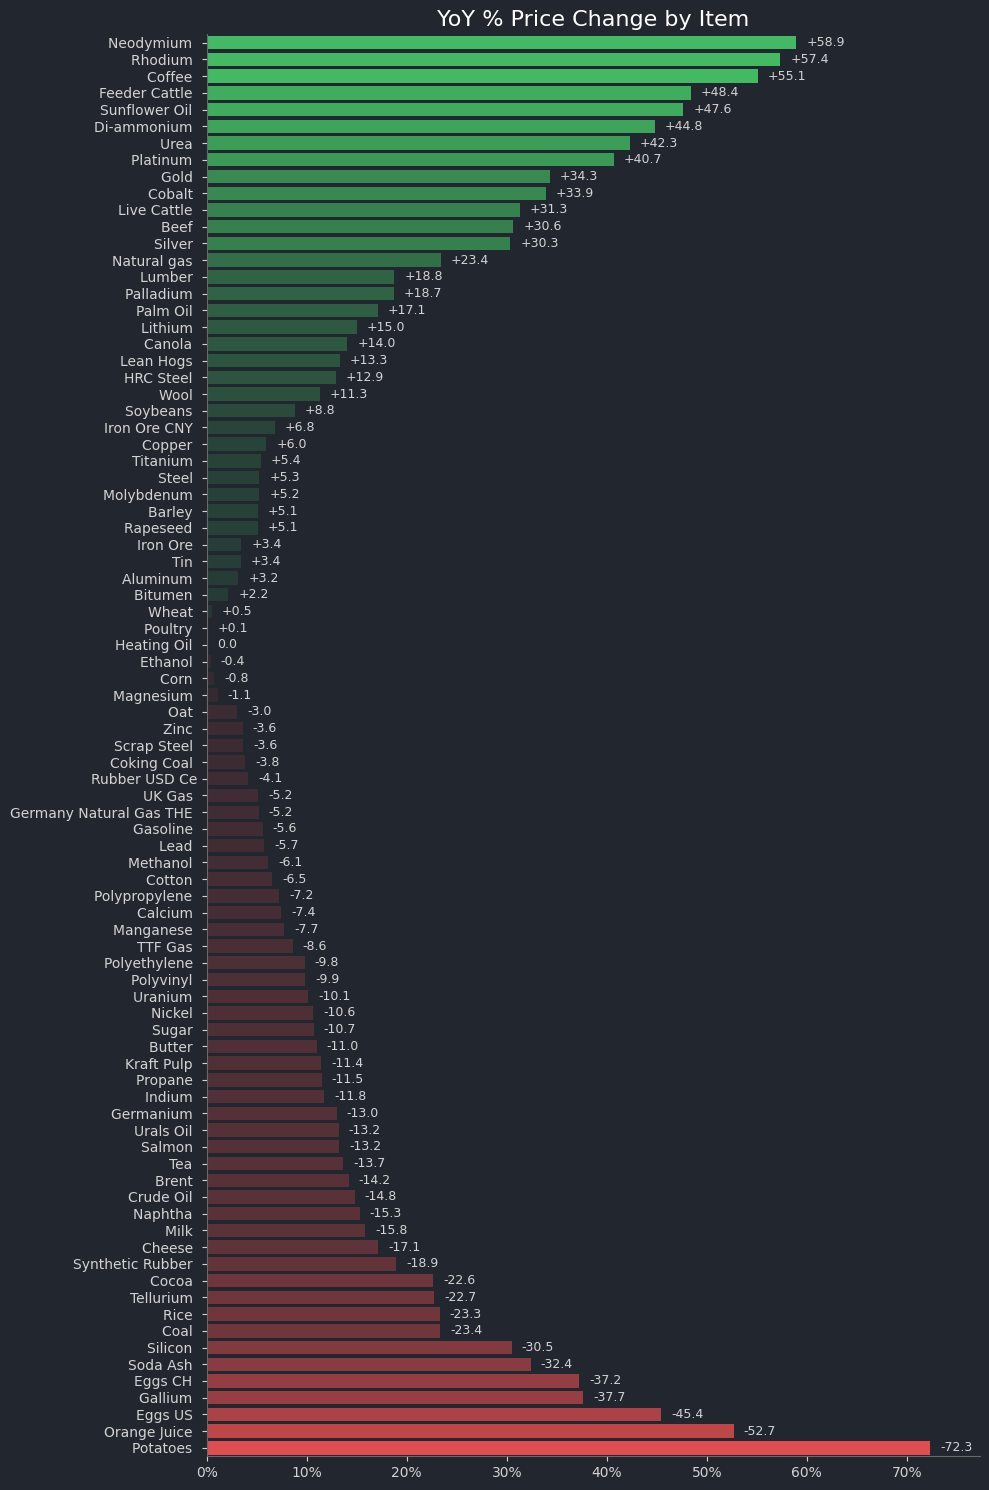

In [26]:
# Prepare x and y data
df = TradingEconomics.download_commodities().all
df = df[['Item', 'YoY %']][(df['Category'] != 'Index') & (df['Category'] != 'Electricity')]
df_sorted = df.sort_values(by='YoY %', ascending=False, ignore_index=True)
x = df_sorted['YoY %']
y = df_sorted['Item']

# Define colors
background_color = '#22262F'
pos_bar_color = '#30CC5A'
neg_bar_color = '#F63538'
title_color = 'white'
axes_label_color = 'lightgray'
tick_color = 'lightgray'
spine_color = 'dimgray'
data_label_color = 'lightgray'

# Create figure
bar_colors = ['r' if x < 0 else 'g' for x in x]
color_palette = {'r': neg_bar_color, 'g': pos_bar_color}
x = abs(x)

fig, ax = plt.subplots(figsize=(10, 15))
sns.barplot(x=x, y=y, hue=bar_colors, palette=color_palette, legend=False)
ax.set_title('YoY % Price Change by Item', fontsize=16, color=title_color)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x:.0f}%"))
ax.set_xlabel('')
ax.set_ylabel('')

# Add data labels
labels = [f'+{x:.1f}' if x > 0 else f'{x:.1f}' for x in df_sorted['YoY %']]
labels_idx_offset = 0
for container in ax.containers:  
    for i, bar in enumerate(container):
        x_val = bar.get_width()
        y_val = bar.get_y() + bar.get_height() / 2
        label = labels[i + labels_idx_offset]
        ax.text(x_val + 1, y_val, label, va='center', ha='left', fontsize=9, color=data_label_color)
    labels_idx_offset += len(container)

# Customize figure
ax.set_xlim(0, max(x) + 5)

fig.set_facecolor(background_color)
ax.set_facecolor(background_color)

ax.tick_params(axis='x', colors=tick_color)
ax.tick_params(axis='y', colors=tick_color)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color(spine_color)
ax.spines['bottom'].set_color(spine_color)

# Control transparency of bars based on change magnitude; less change = less solid
x = df_sorted['YoY %']
x_pos = x[x >= 0]
x_neg = abs(x[x < 0])
norm_alpha_pos = colors.Normalize(vmin=x_pos.min(), vmax=0.9*x_pos.max(), clip=True)
norm_alpha_neg = colors.Normalize(vmin=x_neg.min(), vmax=0.9*x_neg.max(), clip=True)
min_alpha, max_alpha = 0.1, 1
bar_alphas = [
    min_alpha + (max_alpha - min_alpha) * norm_alpha_neg(abs(val)) if val < 0 else
    min_alpha + (max_alpha - min_alpha) * norm_alpha_pos(abs(val)) for val in x]
[bar.set_alpha(alpha) for alpha, bar in zip(bar_alphas, ax.patches)]

# Show plot
plt.tight_layout()
plt.show()

## 7. Industry and Stock-Level Data from FinViz

[Finviz](https://finviz.com/) offers a wealth of stock market data and a powerful screener. The idea is not to replicate the screener, but to quickly and conveniently retrieve data for custom computations/visualizations.

#### Getting Industry-Level and Stock-Level Data from Finviz

In [27]:
industries = Finviz.download_industries()

industry_table = industries.table
industry_table = industry_table.set_index(industry_table.columns[0]) 
displayMD(industry_table.head(), index=True, bold=True, align='center')

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b></b></th>
      <th><b>Sector</b></th>
      <th><b>Market Cap (m USD)</b></th>
      <th><b>P/E</b></th>
      <th><b>Fwd P/E</b></th>
      <th><b>PEG</b></th>
      <th><b>P/S</b></th>
      <th><b>P/B</b></th>
      <th><b>P/C</b></th>
      <th><b>P/FCF</b></th>
      <th><b>Dividend (%)</b></th>
      <th><b>EPS past 5Y (%)</b></th>
      <th><b>EPS next 5Y (%)</b></th>
      <th><b>Sales past 5Y (%)</b></th>
      <th><b>Float Short (%)</b></th>
      <th><b>Perf Week (%)</b></th>
      <th><b>Perf Month (%)</b></th>
      <th><b>Perf Quart (%)</b></th>
      <th><b>Perf Half (%)</b></th>
      <th><b>Perf Year (%)</b></th>
      <th><b>Perf YTD (%)</b></th>
      <th><b>Recom</b></th>
      <th><b>Avg Volume (m USD)</b></th>
      <th><b>Rel Volume</b></th>
      <th><b>Change (%)</b></th>
      <th><b>Volume (m USD)</b></th>
      <th><b>Stocks</b></th>
    </tr>
    <tr>
      <th><b>Industry</b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th><b>Advertising Agencies</b></th>
      <td>Communication Services</td>
      <td>221860.0</td>
      <td>43.09</td>
      <td>22.42</td>
      <td>1.12</td>
      <td>3.2</td>
      <td>9.07</td>
      <td>17.82</td>
      <td>25.87</td>
      <td>0.74</td>
      <td>62.43</td>
      <td>38.47</td>
      <td>29.2</td>
      <td>6.75</td>
      <td>1.66</td>
      <td>6.16</td>
      <td>11.08</td>
      <td>-2.98</td>
      <td>59.57</td>
      <td>-0.47</td>
      <td>1.74</td>
      <td>55.92</td>
      <td>1.17</td>
      <td>4.61</td>
      <td>65.39</td>
      <td>43</td>
    </tr>
    <tr>
      <th><b>Aerospace &amp; Defense</b></th>
      <td>Industrials</td>
      <td>1528130.0</td>
      <td>42.42</td>
      <td>30.84</td>
      <td>2.81</td>
      <td>3.04</td>
      <td>7.16</td>
      <td>24.03</td>
      <td>51.72</td>
      <td>0.85</td>
      <td>20.49</td>
      <td>15.1</td>
      <td>3.71</td>
      <td>4.43</td>
      <td>0.35</td>
      <td>-0.54</td>
      <td>12.91</td>
      <td>28.36</td>
      <td>31.91</td>
      <td>30.89</td>
      <td>1.83</td>
      <td>185.82</td>
      <td>0.71</td>
      <td>0.4</td>
      <td>132.51</td>
      <td>76</td>
    </tr>
    <tr>
      <th><b>Agricultural Inputs</b></th>
      <td>Basic Materials</td>
      <td>121140.0</td>
      <td>21.9</td>
      <td>14.83</td>
      <td>1.79</td>
      <td>1.53</td>
      <td>1.51</td>
      <td>16.53</td>
      <td>17.29</td>
      <td>2.41</td>
      <td>3.08</td>
      <td>12.23</td>
      <td>4.37</td>
      <td>1.57</td>
      <td>1.84</td>
      <td>-3.94</td>
      <td>1.6</td>
      <td>13.1</td>
      <td>20.66</td>
      <td>20.9</td>
      <td>2.04</td>
      <td>18.35</td>
      <td>0.7</td>
      <td>0.65</td>
      <td>12.88</td>
      <td>16</td>
    </tr>
    <tr>
      <th><b>Airlines</b></th>
      <td>Industrials</td>
      <td>172230.0</td>
      <td>13.05</td>
      <td>10.01</td>
      <td>0.71</td>
      <td>0.62</td>
      <td>2.77</td>
      <td>3.48</td>
      <td>14.83</td>
      <td>1.15</td>
      <td>-5.52</td>
      <td>18.48</td>
      <td>6.21</td>
      <td>6.13</td>
      <td>2.54</td>
      <td>10.5</td>
      <td>23.16</td>
      <td>11.89</td>
      <td>64.14</td>
      <td>10.72</td>
      <td>1.69</td>
      <td>131.4</td>
      <td>1.02</td>
      <td>5.28</td>
      <td>134.56</td>
      <td>18</td>
    </tr>
    <tr>
      <th><b>Airports &amp; Air Services</b></th>
      <td>Industrials</td>
      <td>42880.0</td>
      <td>31.59</td>
      <td>21.15</td>
      <td>2.61</td>
      <td>5.46</td>
      <td>7.2</td>
      <td>12.05</td>
      <td>33.62</td>
      <td>4.1</td>
      <td>20.26</td>
      <td>12.11</td>
      <td>13.18</td>
      <td>6.75</td>
      <td>-2.5</td>
      <td>0.78</td>
      <td>24.63</td>
      <td>43.07</td>
      <td>63.87</td>
      <td>45.99</td>
      <td>2.74</td>
      <td>41.28</td>
      <td>1.11</td>
      <td>0.98</td>
      <td>45.98</td>
      <td>9</td>
    </tr>
  </tbody>
</table></div>

In [31]:
stocks = Finviz.download_stocks(num_rows=10) # if num_rows is not specified, all rows are returned.

stocks_table = stocks.table
stocks_table = stocks_table.set_index(stocks_table.columns[0])
displayMD(stocks_table, index=True, bold=True, align='center')

<div align="center"><table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th><b></b></th>
      <th><b>Company</b></th>
      <th><b>Index</b></th>
      <th><b>Sector</b></th>
      <th><b>Industry</b></th>
      <th><b>Country</b></th>
      <th><b>Exchange</b></th>
      <th><b>Market Cap (m USD)</b></th>
      <th><b>P/E</b></th>
      <th><b>Fwd P/E</b></th>
      <th><b>PEG</b></th>
      <th><b>P/S</b></th>
      <th><b>P/B</b></th>
      <th><b>P/C</b></th>
      <th><b>P/FCF</b></th>
      <th><b>Book/sh</b></th>
      <th><b>Cash/sh</b></th>
      <th><b>Dividend</b></th>
      <th><b>Dividend (%)</b></th>
      <th><b>Dividend TTM</b></th>
      <th><b>Dividend Ex Date</b></th>
      <th><b>Payout Ratio (%)</b></th>
      <th><b>EPS</b></th>
      <th><b>EPS next Q</b></th>
      <th><b>EPS This Y (%)</b></th>
      <th><b>EPS Next Y (%)</b></th>
      <th><b>EPS Past 5Y (%)</b></th>
      <th><b>EPS Next 5Y (%)</b></th>
      <th><b>Sales Past 5Y (%)</b></th>
      <th><b>Sales Q/Q (%)</b></th>
      <th><b>EPS Q/Q (%)</b></th>
      <th><b>EPS YoY TTM (%)</b></th>
      <th><b>Sales YoY TTM (%)</b></th>
      <th><b>Sales (m USD)</b></th>
      <th><b>Income (m USD)</b></th>
      <th><b>EPS Surprise (%)</b></th>
      <th><b>Revenue Surprise (%)</b></th>
      <th><b>Outstanding (m USD)</b></th>
      <th><b>Float (m USD)</b></th>
      <th><b>Float %</b></th>
      <th><b>Insider Own (%)</b></th>
      <th><b>Insider Trans (%)</b></th>
      <th><b>Inst Own (%)</b></th>
      <th><b>Inst Trans (%)</b></th>
      <th><b>Short Float (%)</b></th>
      <th><b>Short Ratio</b></th>
      <th><b>Short Interest (m USD)</b></th>
      <th><b>ROA (%)</b></th>
      <th><b>ROE (%)</b></th>
      <th><b>ROIC (%)</b></th>
      <th><b>Curr R</b></th>
      <th><b>Quick R</b></th>
      <th><b>LTDebt/Eq</b></th>
      <th><b>Debt/Eq</b></th>
      <th><b>Gross M (%)</b></th>
      <th><b>Oper M (%)</b></th>
      <th><b>Profit M (%)</b></th>
      <th><b>Perf Week (%)</b></th>
      <th><b>Perf Month (%)</b></th>
      <th><b>Perf Quart (%)</b></th>
      <th><b>Perf Half (%)</b></th>
      <th><b>Perf Year (%)</b></th>
      <th><b>Perf YTD (%)</b></th>
      <th><b>Beta</b></th>
      <th><b>ATR</b></th>
      <th><b>Volatility W (%)</b></th>
      <th><b>Volatility M (%)</b></th>
      <th><b>SMA20 (%)</b></th>
      <th><b>SMA50 (%)</b></th>
      <th><b>SMA200 (%)</b></th>
      <th><b>50D High (%)</b></th>
      <th><b>50D Low (%)</b></th>
      <th><b>52W High (%)</b></th>
      <th><b>52W Low (%)</b></th>
      <th><b>52W Range</b></th>
      <th><b>All-Time High (%)</b></th>
      <th><b>All-Time Low (%)</b></th>
      <th><b>RSI</b></th>
      <th><b>Earnings</b></th>
      <th><b>IPO Date</b></th>
      <th><b>Optionable</b></th>
      <th><b>Shortable</b></th>
      <th><b>Employees</b></th>
      <th><b>Change from Open (%)</b></th>
      <th><b>Gap (%)</b></th>
      <th><b>Recom</b></th>
      <th><b>Avg Volume (m USD)</b></th>
      <th><b>Rel Volume</b></th>
      <th><b>Volume</b></th>
      <th><b>Target Price</b></th>
      <th><b>Prev Close</b></th>
      <th><b>Open</b></th>
      <th><b>High</b></th>
      <th><b>Low</b></th>
      <th><b>Price</b></th>
      <th><b>Change (%)</b></th>
    </tr>
    <tr>
      <th><b>Ticker</b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
      <th><b></b></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th><b>A</b></th>
      <td>Agilent Technologies Inc</td>
      <td>S&amp;P 500</td>
      <td>Healthcare</td>
      <td>Diagnostics &amp; Research</td>
      <td>USA</td>
      <td>NYSE</td>
      <td>34550.0</td>
      <td>30.0</td>
      <td>20.09</td>
      <td>3.71</td>
      <td>5.21</td>
      <td>5.63</td>
      <td>23.25</td>
      <td>29.06</td>
      <td>21.61</td>
      <td>5.23</td>
      <td>0.98</td>
      <td>0.81</td>
      <td>0.98</td>
      <td>01/07/2025</td>
      <td>21.31</td>
      <td>4.05</td>
      <td>1.37</td>
      <td>5.49</td>
      <td>8.47</td>
      <td>5.63</td>
      <td>8.09</td>
      <td>4.75</td>
      <td>6.04</td>
      <td>-28.23</td>
      <td>-4.08</td>
      <td>0.56</td>
      <td>6630.0</td>
      <td>1170.0</td>
      <td>3.57</td>
      <td>2.54</td>
      <td>283.94</td>
      <td>282.71</td>
      <td>99.57</td>
      <td>0.48</td>
      <td>-1.03</td>
      <td>91.41</td>
      <td>0.92</td>
      <td>1.08</td>
      <td>1.7</td>
      <td>3.06</td>
      <td>10.13</td>
      <td>18.88</td>
      <td>12.29</td>
      <td>2.09</td>
      <td>1.6</td>
      <td>0.55</td>
      <td>0.57</td>
      <td>53.95</td>
      <td>23.94</td>
      <td>17.59</td>
      <td>2.04</td>
      <td>1.06</td>
      <td>10.9</td>
      <td>-10.15</td>
      <td>-12.97</td>
      <td>-9.46</td>
      <td>1.23</td>
      <td>2.74</td>
      <td>2.16</td>
      <td>2.01</td>
      <td>3.81</td>
      <td>3.23</td>
      <td>-2.2</td>
      <td>-3.8</td>
      <td>9.82</td>
      <td>-20.94</td>
      <td>26.13</td>
      <td>96.43 - 153.84</td>
      <td>-32.27</td>
      <td>1619.25</td>
      <td>58.66</td>
      <td>27/08/2025</td>
      <td>18/11/1999</td>
      <td>Yes</td>
      <td>Yes</td>
      <td>17900</td>
      <td>2.81</td>
      <td>0.99</td>
      <td>2.24</td>
      <td>1.8</td>
      <td>0.72</td>
      <td>1290961</td>
      <td>137.86</td>
      <td>117.15</td>
      <td>118.31</td>
      <td>122.41</td>
      <td>117.46</td>
      <td>121.63</td>
      <td>3.82</td>
    </tr>
    <tr>
      <th><b>AA</b></th>
      <td>Alcoa Corp</td>
      <td>-</td>
      <td>Basic Materials</td>
      <td>Aluminum</td>
      <td>USA</td>
      <td>NYSE</td>
      <td>8200.0</td>
      <td>8.13</td>
      <td>12.47</td>
      <td>0.25</td>
      <td>0.63</td>
      <td>1.34</td>
      <td>4.9</td>
      <td>14.09</td>
      <td>23.7</td>
      <td>6.47</td>
      <td>0.4</td>
      <td>1.26</td>
      <td>0.4</td>
      <td>12/08/2025</td>
      <td>142.65</td>
      <td>3.9</td>
      <td>0.26</td>
      <td>149.09</td>
      <td>-24.48</td>
      <td>&lt;NA&gt;</td>
      <td>32.26</td>
      <td>3.03</td>
      <td>3.85</td>
      <td>470.86</td>
      <td>227.19</td>
      <td>21.32</td>
      <td>13020.0</td>
      <td>1000.0</td>
      <td>20.97</td>
      <td>3.8</td>
      <td>258.91</td>
      <td>257.81</td>
      <td>99.58</td>
      <td>0.43</td>
      <td>0.0</td>
      <td>78.57</td>
      <td>11.04</td>
      <td>6.26</td>
      <td>2.73</td>
      <td>16.13</td>
      <td>6.85</td>
      <td>20.01</td>
      <td>11.53</td>
      <td>1.65</td>
      <td>0.97</td>
      <td>0.42</td>
      <td>0.43</td>
      <td>18.81</td>
      <td>16.07</td>
      <td>7.71</td>
      <td>1.31</td>
      <td>-0.56</td>
      <td>13.22</td>
      <td>-7.91</td>
      <td>-6.16</td>
      <td>-16.15</td>
      <td>2.26</td>
      <td>1.2</td>
      <td>4.13</td>
      <td>3.6</td>
      <td>5.04</td>
      <td>5.7</td>
      <td>-4.25</td>
      <td>-2.01</td>
      <td>14.29</td>
      <td>-33.68</td>
      <td>47.14</td>
      <td>21.53 - 47.77</td>
      <td>-67.7</td>
      <td>513.95</td>
      <td>57.92</td>
      <td>16/07/2025</td>
      <td>18/10/2016</td>
      <td>Yes</td>
      <td>Yes</td>
      <td>13900</td>
      <td>7.14</td>
      <td>0.2</td>
      <td>2.14</td>
      <td>5.9</td>
      <td>1.44</td>
      <td>8486437</td>
      <td>32.9</td>
      <td>29.51</td>
      <td>29.57</td>
      <td>32.16</td>
      <td>29.49</td>
      <td>31.68</td>
      <td>7.35</td>
    </tr>
    <tr>
      <th><b>AACB</b></th>
      <td>Artius II Acquisition Inc</td>
      <td>-</td>
      <td>Financial</td>
      <td>Shell Companies</td>
      <td>USA</td>
      <td>NASD</td>
      <td>295.29</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>1.33</td>
      <td>1230.37</td>
      <td>&lt;NA&gt;</td>
      <td>7.63</td>
      <td>0.01</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&amp;nbsp;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>29.15</td>
      <td>23.48</td>
      <td>80.55</td>
      <td>19.47</td>
      <td>0.0</td>
      <td>70.38</td>
      <td>&lt;NA&gt;</td>
      <td>0.02</td>
      <td>0.05</td>
      <td>0.0</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>2.92</td>
      <td>2.92</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>0.0</td>
      <td>0.1</td>
      <td>1.66</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>2.53</td>
      <td>&lt;NA&gt;</td>
      <td>0.02</td>
      <td>0.02</td>
      <td>0.08</td>
      <td>-0.0</td>
      <td>0.2</td>
      <td>0.79</td>
      <td>-0.49</td>
      <td>1.2</td>
      <td>-0.49</td>
      <td>2.84</td>
      <td>9.85 - 10.18</td>
      <td>-0.49</td>
      <td>2.84</td>
      <td>52.63</td>
      <td>&amp;nbsp;</td>
      <td>07/04/2025</td>
      <td>No</td>
      <td>Yes</td>
      <td>1</td>
      <td>0.1</td>
      <td>0.0</td>
      <td>&lt;NA&gt;</td>
      <td>0.08816</td>
      <td>0.0</td>
      <td>5</td>
      <td>&lt;NA&gt;</td>
      <td>10.12</td>
      <td>10.12</td>
      <td>10.12</td>
      <td>10.12</td>
      <td>10.13</td>
      <td>0.1</td>
    </tr>
    <tr>
      <th><b>AACG</b></th>
      <td>ATA Creativity Global ADR</td>
      <td>-</td>
      <td>Consumer Defensive</td>
      <td>Education &amp; Training Services</td>
      <td>China</td>
      <td>NASD</td>
      <td>59.99</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>1.55</td>
      <td>7.69</td>
      <td>12.39</td>
      <td>&lt;NA&gt;</td>
      <td>0.24</td>
      <td>0.15</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>27/08/2018</td>
      <td>&lt;NA&gt;</td>
      <td>-0.11</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>26.78</td>
      <td>&lt;NA&gt;</td>
      <td>21.36</td>
      <td>8.11</td>
      <td>35.5</td>
      <td>24.98</td>
      <td>15.48</td>
      <td>38.81</td>
      <td>-3.52</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>31.91</td>
      <td>8.84</td>
      <td>27.7</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>0.51</td>
      <td>-0.29</td>
      <td>1.04</td>
      <td>0.4</td>
      <td>0.09</td>
      <td>-5.59</td>
      <td>-37.39</td>
      <td>-36.0</td>
      <td>0.19</td>
      <td>0.19</td>
      <td>0.26</td>
      <td>0.82</td>
      <td>52.67</td>
      <td>-11.16</td>
      <td>-9.08</td>
      <td>-4.08</td>
      <td>74.07</td>
      <td>104.37</td>
      <td>100.0</td>
      <td>189.68</td>
      <td>122.22</td>
      <td>1.09</td>
      <td>0.25</td>
      <td>11.42</td>
      <td>22.62</td>
      <td>10.69</td>
      <td>57.05</td>
      <td>90.08</td>
      <td>-18.26</td>
      <td>150.3</td>
      <td>-18.26</td>
      <td>276.0</td>
      <td>0.50 - 2.30</td>
      <td>-90.48</td>
      <td>766.5</td>
      <td>57.29</td>
      <td>25/03/2025</td>
      <td>29/01/2008</td>
      <td>No</td>
      <td>Yes</td>
      <td>599</td>
      <td>11.9</td>
      <td>-1.75</td>
      <td>1.0</td>
      <td>0.23168</td>
      <td>0.18</td>
      <td>40717</td>
      <td>6.5</td>
      <td>1.71</td>
      <td>1.68</td>
      <td>1.92</td>
      <td>1.68</td>
      <td>1.88</td>
      <td>9.94</td>
    </tr>
    <tr>
      <th><b>AACI</b></th>
      <td>Armada Acquisition Corp. II</td>
      <td>-</td>
      <td>Financial</td>
      <td>Shell Companies</td>
      <td>USA</td>
      <td>NASD</td>
      <td>325.69</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&amp;nbsp;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>31.59</td>
      <td>23.31</td>
      <td>73.79</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>0.03</td>
      <td>0.03</td>
      <td>0.01</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>-0.19</td>
      <td>2.08</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>2.69</td>
      <td>&lt;NA&gt;</td>
      <td>0.06</td>
      <td>0.37</td>
      <td>0.43</td>
      <td>1.44</td>
      <td>2.04</td>
      <td>2.04</td>
      <td>-1.81</td>
      <td>3.1</td>
      <td>-1.81</td>
      <td>3.1</td>
      <td>10.00 - 10.50</td>
      <td>-1.81</td>
      <td>3.1</td>
      <td>70.3</td>
      <td>&amp;nbsp;</td>
      <td>24/06/2025</td>
      <td>No</td>
      <td>Yes</td>
      <td>&lt;NA&gt;</td>
      <td>0.1</td>
      <td>0.0</td>
      <td>&lt;NA&gt;</td>
      <td>0.20549</td>
      <td>1.65</td>
      <td>339545</td>
      <td>&lt;NA&gt;</td>
      <td>10.3</td>
      <td>10.3</td>
      <td>10.31</td>
      <td>10.27</td>
      <td>10.31</td>
      <td>0.1</td>
    </tr>
    <tr>
      <th><b>AACT</b></th>
      <td>Ares Acquisition Corporation II</td>
      <td>-</td>
      <td>Financial</td>
      <td>Shell Companies</td>
      <td>USA</td>
      <td>NYSE</td>
      <td>705.2</td>
      <td>43.63</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>1.32</td>
      <td>5037.17</td>
      <td>&lt;NA&gt;</td>
      <td>8.63</td>
      <td>0.0</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&amp;nbsp;</td>
      <td>0.0</td>
      <td>0.26</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>-94.97</td>
      <td>-37.96</td>
      <td>&lt;NA&gt;</td>
      <td>0.0</td>
      <td>16.33</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>61.86</td>
      <td>49.36</td>
      <td>79.79</td>
      <td>20.21</td>
      <td>0.0</td>
      <td>92.06</td>
      <td>&lt;NA&gt;</td>
      <td>0.16</td>
      <td>0.2</td>
      <td>0.08</td>
      <td>2.97</td>
      <td>3.11</td>
      <td>3.02</td>
      <td>0.23</td>
      <td>0.23</td>
      <td>0.01</td>
      <td>0.02</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>0.18</td>
      <td>0.0</td>
      <td>0.97</td>
      <td>3.07</td>
      <td>5.95</td>
      <td>3.83</td>
      <td>-0.01</td>
      <td>0.04</td>
      <td>0.26</td>
      <td>0.33</td>
      <td>-0.0</td>
      <td>0.31</td>
      <td>2.15</td>
      <td>-0.7</td>
      <td>1.38</td>
      <td>-1.89</td>
      <td>6.15</td>
      <td>10.74 - 11.62</td>
      <td>-1.89</td>
      <td>12.93</td>
      <td>53.21</td>
      <td>&amp;nbsp;</td>
      <td>12/06/2023</td>
      <td>Yes</td>
      <td>Yes</td>
      <td>4</td>
      <td>0.18</td>
      <td>-0.18</td>
      <td>&lt;NA&gt;</td>
      <td>0.38929</td>
      <td>0.28</td>
      <td>109090</td>
      <td>&lt;NA&gt;</td>
      <td>11.4</td>
      <td>11.38</td>
      <td>11.42</td>
      <td>11.38</td>
      <td>11.4</td>
      <td>0.0</td>
    </tr>
    <tr>
      <th><b>AAL</b></th>
      <td>American Airlines Group Inc</td>
      <td>-</td>
      <td>Industrials</td>
      <td>Airlines</td>
      <td>USA</td>
      <td>NASD</td>
      <td>8940.0</td>
      <td>17.42</td>
      <td>8.27</td>
      <td>3.12</td>
      <td>0.16</td>
      <td>&lt;NA&gt;</td>
      <td>0.95</td>
      <td>5.72</td>
      <td>-5.87</td>
      <td>14.22</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>04/02/2020</td>
      <td>0.0</td>
      <td>0.78</td>
      <td>-0.29</td>
      <td>-77.07</td>
      <td>264.69</td>
      <td>-20.93</td>
      <td>5.59</td>
      <td>3.44</td>
      <td>0.4</td>
      <td>-8.87</td>
      <td>556.18</td>
      <td>1.5</td>
      <td>54250.0</td>
      <td>567.0</td>
      <td>21.78</td>
      <td>0.68</td>
      <td>659.8</td>
      <td>649.71</td>
      <td>98.47</td>
      <td>1.53</td>
      <td>0.0</td>
      <td>64.76</td>
      <td>-3.3</td>
      <td>9.61</td>
      <td>1.01</td>
      <td>62.46</td>
      <td>0.89</td>
      <td>&lt;NA&gt;</td>
      <td>2.05</td>
      <td>0.58</td>
      <td>0.48</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>20.75</td>
      <td>5.06</td>
      <td>1.05</td>
      <td>2.89</td>
      <td>18.24</td>
      <td>18.86</td>
      <td>-11.03</td>
      <td>31.68</td>
      <td>-22.26</td>
      <td>1.39</td>
      <td>0.47</td>
      <td>3.49</td>
      <td>3.18</td>
      <td>11.07</td>
      <td>14.49</td>
      <td>2.28</td>
      <td>1.27</td>
      <td>32.07</td>
      <td>-29.06</td>
      <td>59.41</td>
      <td>8.50 - 19.10</td>
      <td>-77.06</td>
      <td>64.24</td>
      <td>64.85</td>
      <td>24/07/2025</td>
      <td>09/12/2013</td>
      <td>Yes</td>
      <td>Yes</td>
      <td>133300</td>
      <td>7.71</td>
      <td>0.08</td>
      <td>2.21</td>
      <td>61.67</td>
      <td>1.02</td>
      <td>62996081</td>
      <td>13.46</td>
      <td>12.57</td>
      <td>12.58</td>
      <td>13.58</td>
      <td>12.58</td>
      <td>13.55</td>
      <td>7.8</td>
    </tr>
    <tr>
      <th><b>AAM</b></th>
      <td>AA Mission Acquisition Corp</td>
      <td>-</td>
      <td>Financial</td>
      <td>Shell Companies</td>
      <td>USA</td>
      <td>NYSE</td>
      <td>461.69</td>
      <td>35.71</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>1.31</td>
      <td>536.84</td>
      <td>&lt;NA&gt;</td>
      <td>8.0</td>
      <td>0.02</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&amp;nbsp;</td>
      <td>0.0</td>
      <td>0.29</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>3096.3</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>0.0</td>
      <td>12.93</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>35.35</td>
      <td>29.32</td>
      <td>82.94</td>
      <td>33.32</td>
      <td>0.0</td>
      <td>85.37</td>
      <td>&lt;NA&gt;</td>
      <td>0.0</td>
      <td>0.01</td>
      <td>0.0</td>
      <td>7.13</td>
      <td>7.35</td>
      <td>3.68</td>
      <td>0.7</td>
      <td>0.7</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>0.48</td>
      <td>0.57</td>
      <td>1.55</td>
      <td>3.45</td>
      <td>&lt;NA&gt;</td>
      <td>3.96</td>
      <td>&lt;NA&gt;</td>
      <td>0.03</td>
      <td>0.24</td>
      <td>0.19</td>
      <td>0.29</td>
      <td>0.58</td>
      <td>2.51</td>
      <td>-2.69</td>
      <td>1.74</td>
      <td>-2.69</td>
      <td>5.42</td>
      <td>9.96 - 10.79</td>
      <td>-2.69</td>
      <td>5.42</td>
      <td>59.22</td>
      <td>&amp;nbsp;</td>
      <td>16/09/2024</td>
      <td>No</td>
      <td>Yes</td>
      <td>2</td>
      <td>0.0</td>
      <td>0.29</td>
      <td>&lt;NA&gt;</td>
      <td>0.05912</td>
      <td>0.04</td>
      <td>2104</td>
      <td>&lt;NA&gt;</td>
      <td>10.47</td>
      <td>10.5</td>
      <td>10.5</td>
      <td>10.5</td>
      <td>10.5</td>
      <td>0.29</td>
    </tr>
    <tr>
      <th><b>AAME</b></th>
      <td>Atlantic American Corp</td>
      <td>-</td>
      <td>Financial</td>
      <td>Insurance - Life</td>
      <td>USA</td>
      <td>NASD</td>
      <td>66.91</td>
      <td>33.06</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>0.34</td>
      <td>0.63</td>
      <td>&lt;NA&gt;</td>
      <td>3.78</td>
      <td>5.2</td>
      <td>&lt;NA&gt;</td>
      <td>0.02</td>
      <td>0.61</td>
      <td>0.02</td>
      <td>09/04/2025</td>
      <td>&lt;NA&gt;</td>
      <td>0.1</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>-42.6</td>
      <td>&lt;NA&gt;</td>
      <td>-1.03</td>
      <td>15.99</td>
      <td>496.61</td>
      <td>160.11</td>
      <td>6.98</td>
      <td>198.98</td>
      <td>2.13</td>
      <td>&lt;NA&gt;</td>
      <td>&lt;NA&gt;</td>
      <td>20.4</td>
      <td>3.83</td>
      <td>18.77</td>
      <td>81.21</td>
      <td>0.0</td>
      <td>4.28</td>
      <td>0.29</td>
      <td>0.31</td>
      <td>0.49</td>
      <td>0.01</td>
      <td>0.66</td>
      <td>2.45</td>
      <td>1.43</td>
      <td>1.3</td>
      <td>&lt;NA&gt;</td>
      <td>0.4</td>
      <td>0.41</td>
      <td>&lt;NA&gt;</td>
      <td>3.31</td>
      <td>1.07</td>
      <td>6.52</td>
      <td>44.49</td>
      <td>92.94</td>
      <td>107.59</td>
      <td>111.61</td>
      <td>112.99</td>
      <td>0.72</td>
      <td>0.26</td>
      <td>11.56</td>
      <td>9.15</td>
      <td>24.97</td>
      <td>42.17</td>
      <td>86.4</td>
      <td>-10.38</td>
      <td>89.34</td>
      <td>-10.38</td>
      <td>162.88</td>
      <td>1.25 - 3.66</td>
      <td>-79.46</td>
      <td>802.89</td>
      <td>70.64</td>
      <td>&amp;nbsp;</td>
      <td>17/03/1980</td>
      <td>No</td>
      <td>Yes</td>
      <td>156</td>
      <td>2.82</td>
      <td>-0.93</td>
      <td>&lt;NA&gt;</td>
      <td>0.02451</td>
      <td>1.65</td>
      <td>40326</td>
      <td>&lt;NA&gt;</td>
      <td>3.22</td>
      <td>3.19</td>
      <td>3.41</td>
      <td>3.19</td>
      <td>3.28</td>
      <td>1.86</td>
    </tr>
    <tr>
      <th><b>AAMI</b></th>
      <td>Acadian Asset Management Inc</td>
      <td>RUT</td>
      <td>Financial</td>
      <td>Asset Management</td>
      <td>USA</td>
      <td>NYSE</td>
      <td>1750.0</td>
      <td>20.44</td>
      <td>11.96</td>
      <td>&lt;NA&gt;</td>
      <td>3.13</td>
      <td>190.66</td>
      <td>18.68</td>
      <td>17.31</td>
      <td>0.26</td>
      <td>2.62</td>
      <td>0.04</td>
      <td>0.08</td>
      <td>0.04</td>
      <td>12/09/2025</td>
      <td>1.8</td>
      <td>2.4</td>
      <td>0.71</td>
      <td>15.94</td>
      <td>27.97</td>
      <td>-1.99</td>
      <td>&lt;NA&gt;</td>
      <td>-9.68</td>
      <td>26.65</td>
      <td>-2.29</td>
      <td>42.83</td>
      <td>21.14</td>
      <td>560.4</td>
      <td>89.6</td>
      <td>21.9</td>
      <td>6.21</td>
      <td>35.81</td>
      <td>35.15</td>
      <td>98.16</td>
      <td>1.85</td>
      <td>0.0</td>
      <td>100.45</td>
      <td>-0.63</td>
      <td>1.65</td>
      <td>2.34</td>
      <td>0.58</td>
      <td>14.87</td>
      <td>282.39</td>
      <td>24.7</td>
      <td>1.71</td>
      <td>1.71</td>
      <td>38.43</td>
      <td>38.95</td>
      <td>96.41</td>
      <td>29.09</td>
      <td>15.99</td>
      <td>4.12</td>
      <td>22.6</td>
      <td>66.32</td>
      <td>90.51</td>
      <td>111.21</td>
      <td>85.95</td>
      <td>1.41</td>
      <td>1.5</td>
      <td>3.55</td>
      <td>3.58</td>
      <td>9.61</td>
      <td>23.37</td>
      <td>61.01</td>
      <td>0.52</td>
      <td>58.1</td>
      <td>0.52</td>
      <td>116.73</td>
      <td>22.60 - 48.72</td>
      <td>0.52</td>
      <td>1256.79</td>
      <td>72.96</td>
      <td>31/07/2025</td>
      <td>09/10/2014</td>
      <td>Yes</td>
      <td>Yes</td>
      <td>383</td>
      <td>3.38</td>
      <td>0.45</td>
      <td>3.0</td>
      <td>0.24809</td>
      <td>1.92</td>
      <td>476561</td>
      <td>41.67</td>
      <td>47.17</td>
      <td>47.38</td>
      <td>49.47</td>
      <td>47.2</td>
      <td>48.98</td>
      <td>3.84</td>
    </tr>
  </tbody>
</table></div>

<br>The description of a particular stock may be obtained as follows:

In [30]:
desc = Finviz.stock_description('AAPL')
displayMD(desc, block=True)

><p style="text-align: left";>Apple, Inc. engages in the design, manufacture, and sale of smartphones, personal computers, tablets, wearables and accessories, and other varieties of related services. It operates through the following geographical segments: Americas, Europe, Greater China, Japan, and Rest of Asia Pacific. The Americas segment includes North and South America. The Europe segment consists of European countries, as well as India, the Middle East, and Africa. The Greater China segment comprises China, Hong Kong, and Taiwan. The Rest of Asia Pacific segment includes Australia and Asian countries. Its products and services include iPhone, Mac, iPad, AirPods, Apple TV, Apple Watch, Beats products, AppleCare, iCloud, digital content stores, streaming, and licensing services. The company was founded by Steven Paul Jobs, Ronald Gerald Wayne, and Stephen G. Wozniak in April 1976 and is headquartered in Cupertino, CA.</p>